# PROYECTO APRENDIZAJE AUTOMÁTICO

Para el desarrollo del proyecto en la materia de aprendizaje automático, se seleccionó un dataframe que relaciona información sobre películas y series de televisión encontradas en la plataforma de Netflix. Por lo tanto, este conjunto de datos consta de 8807 datos recolectados y 12 columnas principales que representan las características de cada contenido. Este se puede buscar en la siguiente ruta: https://www.kaggle.com/datasets/shivamb/netflix-shows

Por otra parte, es importante utilizar las seis fases de la metodología CRIPS-DM, con el objetivo de planificar y organizar correctamente la elaboración del proyecto.

## FASE 1: COMPRENSIÓN DEL NEGOCIO.

Netflix es una compañía que ofrece servicio de streaming por suscripción a millones de usuarios, los cuales pueden acceder para observar gran variedad de películas, series y documentales que deseen. Además consumir esta plataforma por medio de dispositivos como: celulares, computadores, tabletas o televisiones inteligentes, dado que la única condición que deben conservar es una conexión a Internet. A esto se suma que, Netflix dentro de su plataforma, el contenido varia según la región y el tiempo. De ese modo, cuenta con un sistema de recomendaciones que se ajusta a las preferencias y gustos que conserven los usuarios. 

Contemplado lo anterior, la compañía de Netflix basa su modelo de negocio de la siguiente manera: 

1. Suscripción: los usuarios pagan por una tarifa mensual para acceder a todo el contenido que ofrece la plataforma de Netflix. 

undefined. Contenido: la plataforma ofrece un amplio catálogo de películas, series y documentales que sus usuarios pueden acceder en cualquier momento. 

undefined. Personalización: mediante algoritmos de aprendizaje automático la plataforma ofrece o sugiere contenido a sus usuarios a partir de las preferencias que tengan. 

undefined. Contenido original: la compañía se encarga de producir contenido original con el objetivo de atraer más suscriptores a la plataforma. 

undefined. Internacionalización: Netflix a expandido sus operaciones en diferentes países del mundo, otorgando contenido acorde a dichas regiones. 

Dado que Netflix desea mejorar sus servicios ofrecidos en la plataforma para los usuarios, se presenta a continuación una problemática con el objetivo de facilitar una solución orientada a la aplicación de algoritmos de aprendizaje automático. Claramente, considerando la información encontrada en el dataframe.

Situación: Netflix detectó que dentro de su plataforma existe un amplio catalogo de películas y series de televisión que sus suscriptores pueden acceder. Sin embargo, debido al aumento sustancial de crear diversos tipos de contenidos originales con tal de estrenarse en el servicio de streaming, la empresa encontró que algunos de estos contenidos como películas debían producirse como series de televisión o viceversa, ocasionando gastos indebidos en la contratación de creadores y en la adquisición de derechos de distribución exclusivo. Por consiguiente, afectando negativamente el modelo de negocio en la suscripción, dado que puede incrementar el costo de la tarifa mensual que pagan los usuarios. 

A raíz de todo lo anterior, la compañía desea identificar que mediante ciertas características que conserve la producción de un contenido original, sería lo más recomendable desarrollarse como tipo película o serie de televisión; con el objetivo de que se optimicen las grandes sumas de inversiones innecesarias.  

## FASE 2: ESTUDIO Y COMPRENSIÓN DE LOS DATOS.

Es importante realizar una comprensión de los datos disponibles en el dataframe con el propósito de conocer a profundidad la problemática que presenta la plataforma de Netflix. Por lo tanto, a continuación se expondrán los datos más relevantes que fueron recolectados en el proceso.

- Show_id: esta variable muestra un identificador para cada dato disponible en el dataframe. (numérica)

- Type: esta variable indica si el dato (contenido) es de tipo película o serie de televisión.(categórica)

- Title: esta variable señala el nombre del dato (contenido). (categórica)

- Director: esta variable muestra el director o directores que estuvieron en la realización del contenido.

- Cast: esta variable expone todos los actores/actrices que participaron en el contenido.

- Country: esta variable señala el país o países donde fue producido dicho contenido.

- Date_added: esta variable indica la fecha que fue estrenada en la plataforma. (categórica)

- Release_year: esta variable señala el año de lanzamiento. (numérica)

- Rating: esta variable muestra la clasificación que conserva el contenido. (categórica)

- Duration: esta variable señala el tiempo de duración que tiene el contenido. (categórica)

- Listed_in: esta variable indica la/s categoría/s en que se encuentra el contenido. (categórica)

- Description: esta variable contiene un breve resumen del contenido. (categórica)

Una vez abordado las características principales del dataset, se procede a descubrir información oculta para formar posibles soluciones a la problemática. 

### 2.1. Importando librerías

In [1]:
#!pip install umap-learn

In [2]:
# !pip install umap==0.1.1

In [3]:
#Importando librerías de trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import umap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

Importando librerías importantes para trabajar en el análisis del dataset de Netflix como en la implementación de los modelos de aprendizaje automático. 

### 2.2. Creando clases para trabajar con el dataset

In [4]:
#Creando clase para procesar el dataset Netflix
class DatasetNetflix():

  #Atributos
  Ruta = ""
  Archivo = None
  Peliculas = None
  SeriesTelevison = None
  DatasetTipo = None
  CantidadTipos = None
  #Constructor

  #Funciones de la clase

  #Función para importar archivo y mostrar
  def ImportarArchivo(self, link):
    self.Ruta = link
    self.Archivo = pd.read_csv(self.Ruta)

  #Función para desplegar información importante del dataset
  def InformacionDataset(self):
    print(self.Archivo.info())
    print("")
    print(self.Archivo.shape)

  #Función que permite conocer la cantidad de valores nulos por columna del dataset
  def ValoresNulos(self):
    print(self.Archivo.isnull().sum())

  #Función para conocer la cantidad de valores nulos que tienen las películas o series de televisión
  def ValoresNulosTipo(self, Tipo):
    self.DatasetTipo = Tipo
    print(self.DatasetTipo.isnull().sum())

  #Función que permite guardar únicamente los datos relacionados a películas en un atributo de la clase
  def TipoPeliculas(self, elementoP):
    self.Peliculas = elementoP

  #Función que permite guardar únicamente los datos relacionados a series de televisión en un atributo de la clase
  def TipoSeries(self, elementoS):
    self.SeriesTelevison = elementoS

  #Esta función permite conocer la cantidad total de datos que hay por tipo
  def InformacionTipos(self):
    self.CantidadTipos = self.Archivo["type"].value_counts()
    print("Películas: " + str(self.CantidadTipos[0]) + " -- %: " + str((self.CantidadTipos[0]/8807)*100))
    print("Tv shows: "+ str(self.CantidadTipos[1]) + " -- %: " + str((self.CantidadTipos[1]/8807)*100))

  #Esta función gráfica la cantidad de tipos existentes en el dataset
  def GraficaTipos(self):
    plt.bar(["Movie", "TV Show"], [self.CantidadTipos[0], self.CantidadTipos[1]])
    plt.xlabel("Tipos")
    plt.ylabel("Cantidad")
    plt.title("Cantidad de películas y Tv show producidas")
    plt.show()

#Creando un objeto de esta clase para utiliar las funciones establecidas
ObjetoDataset = DatasetNetflix()

En este gran bloque de código, se está estableciendo una clase que contendrá una serie de funciones que permitirán tratar la información encontrada en el dataset. Ciertamente, las funciones importantes son las siguientes:

- ImportarArchivo(): conserva la lógica para importar el dataset a trabajar, y guardarlo en un atributo de la clase con tal de ser utilizada más adelante. 

- InformacionDataset(): imprime información importante del dataset como la cantidad de datos y columnas, el tipo de dato utilizado en cada columna, entre otros. 

- ValoresNulos(): permite conocer la cantidad total de valores nulos que contiene el dataset por columna. 

- ValoresNulosTipo(): esta función es exclusiva para conocer los valores nulos que contiene el dataset de películas o series de televisión. 

- TipoPeliculas() y TipoSeries(): estas dos funciones guardan en dos atributos de la clase, los datos únicamente de películas o series. 

- InformacionTipos(): esta función regresa la cantidad de películas y series que tiene el dataset original. 

- GraficaTipos(): función que imprime una gráfica de barras para visualizar la cantidad total de películas y series. 

Finalmente, se crea un objeto de esta clase con el propósito de utilizar los atributos y funciones definidas. 

In [5]:
#Creando clase para obtener información y representarla en gráficas
class GraficasDataset():

  #Atributos
  Dataset = None
  DatasetNormal = None
  ResultadoValores = None
  T1 = None
  T2 = None
  T3 = None
  T4 = None
  ResultadoProcesamiento = None

  Color1 = None
  Color2 = None
  NombreEjeX = None
  NombreEjeY = None
  TituloGrafica = None
  DatosGraficas = None
  Tamano1 = None
  Tamano2 = None

  #Constructor

  #Funciones de la clase

  #Esta función organizar los valores concatenados que hay en algunas columnas del dataset
  def ProcesarColumnasDataset(self, dataset):
    self.Dataset = dataset

    #Esta parte desconcatenada los valores concatenados de cada dato
    self.T1 = self.Dataset.str.split(',', expand=False)
    
    #Esta parte elimina las listas contenidas en la lista principal
    self.T2 = self.T1.explode()

    #Esta parte elimina los valores NaN
    self.T3 = self.T2.dropna()

    #Elimando espacios vacío entre carácteres
    self.T4 = self.T3.str.strip()

    #Esta parte guarda la cantidad de valores asociadas a un elemento correspondiente
    self.ResultadoProcesamiento = self.T4.value_counts()

  #Esta función procesa columnas que no contiene datos concatenados
  def ProcesarSimpleColumna(self, datasetNormal):
    self.DatasetNormal = datasetNormal
    self.ResultadoValores = self.DatasetNormal.value_counts()

  #Esta función crea una gráfica que representará ciertos datos encontrados en el dataset
  def GraficaBarras(self, c1, c2, ejeX, ejeY, Titulo, datos, t1, t2):

    self.Color1 = c1
    self.Color2 = c2
    self.NombreEjeX = ejeX
    self.NombreEjeY = ejeY
    self.TituloGrafica = Titulo
    self.DatosGraficas = datos
    self.Tamano1 = t1
    self.Tamano2 = t2

    #Organizando el tamaño que tendrá la gráfica
    fig = plt.figure(figsize=(self.Tamano1, self.Tamano2))

    colores = [self.Color1, self.Color2]

    #Tipo gráfica barras invertido
    plt.barh(self.DatosGraficas.index, self.DatosGraficas, color = colores)

    #Estableciendo otros atributos
    plt.xlabel(self.NombreEjeX)
    plt.ylabel(self.NombreEjeY)
    plt.title(self.TituloGrafica)
    plt.show()

#Creando un objeto de esta clase
ObjetoGraficas = GraficasDataset()

En esta parte, se crea nuevamente una clase que contiene otros atributos y funciones importantes: 

- ProcesarColumnasDataset(): esta función aplica una serie de procesos a las columnas que conservan valores concatenados como los actores, directores y categorías. Esto se realizar para obtener los datos únicos, y poder asociarlos a una cantidad. 

- ProcesarSimpleColumna(): permite obtener la cantidad total de valores asociados a un dato encontrado en la columna. 

- GraficaBarras(): muestra una gráfica de barras según el dato enviado. 

Finalmente, se crea un objeto de esta clase con el propósito de utilizar los atributos y funciones definidas.

### 2.3. Importando el dataset al entorno de trabajo

In [6]:
ObjetoDataset.ImportarArchivo("netflix_titles.csv")

ObjetoDataset.Archivo.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Utilizando el objeto de la clase para usar las funciones mencionadas anteriormente. Por lo tanto, se importa el archivo, y se muestra parte de los datos. 

In [7]:
ObjetoDataset.InformacionDataset()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

(8807, 12)


Conociendo información importante del dataset. 

In [8]:
ObjetoDataset.ValoresNulos()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


Estudiando la cantidad de valores nulos del dataset. 

In [9]:
ObjetoDataset.InformacionTipos()

Películas: 6131 -- %: 69.61507891449983
Tv shows: 2676 -- %: 30.38492108550017


Conociendo el porcentaje de películas y series de televisión totales en el dataset 

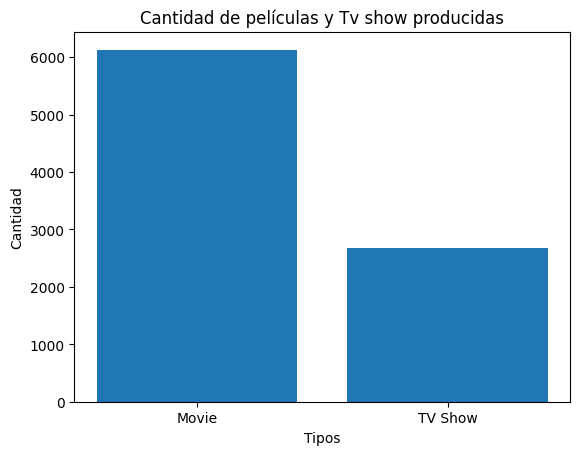

In [10]:
ObjetoDataset.GraficaTipos()

Imprimiendo gráfica para ver representado la cantidad de películas y series disponibles. 

### 2.4. Iniciando exploración del dataset

### 2.4.1. Dataset películas

In [11]:
Condicion = ObjetoDataset.Archivo["type"] == "Movie"

Df_peliculas = ObjetoDataset.Archivo.loc[Condicion, :]

ObjetoDataset.TipoPeliculas(Df_peliculas)

ObjetoDataset.Peliculas.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


Obteniendo del dataset original los datos relacionados a películas. Posteriormente, se imprimen los primeros cinco resultados del nuevo dataset. 

In [12]:
Nulos_Peliculas = ObjetoDataset.ValoresNulosTipo(ObjetoDataset.Peliculas)

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64


Sacando los valores nulos que contiene el dataset de películas. 

In [13]:
#Columan: Cast
ObjetoGraficas.ProcesarColumnasDataset(ObjetoDataset.Peliculas["cast"])

ObjetoGraficas.ResultadoProcesamiento.head(10)

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Akshay Kumar        30
Om Puri             30
Amitabh Bachchan    28
Julie Tejwani       28
Paresh Rawal        28
Boman Irani         27
Rupa Bhimani        27
Name: cast, dtype: int64

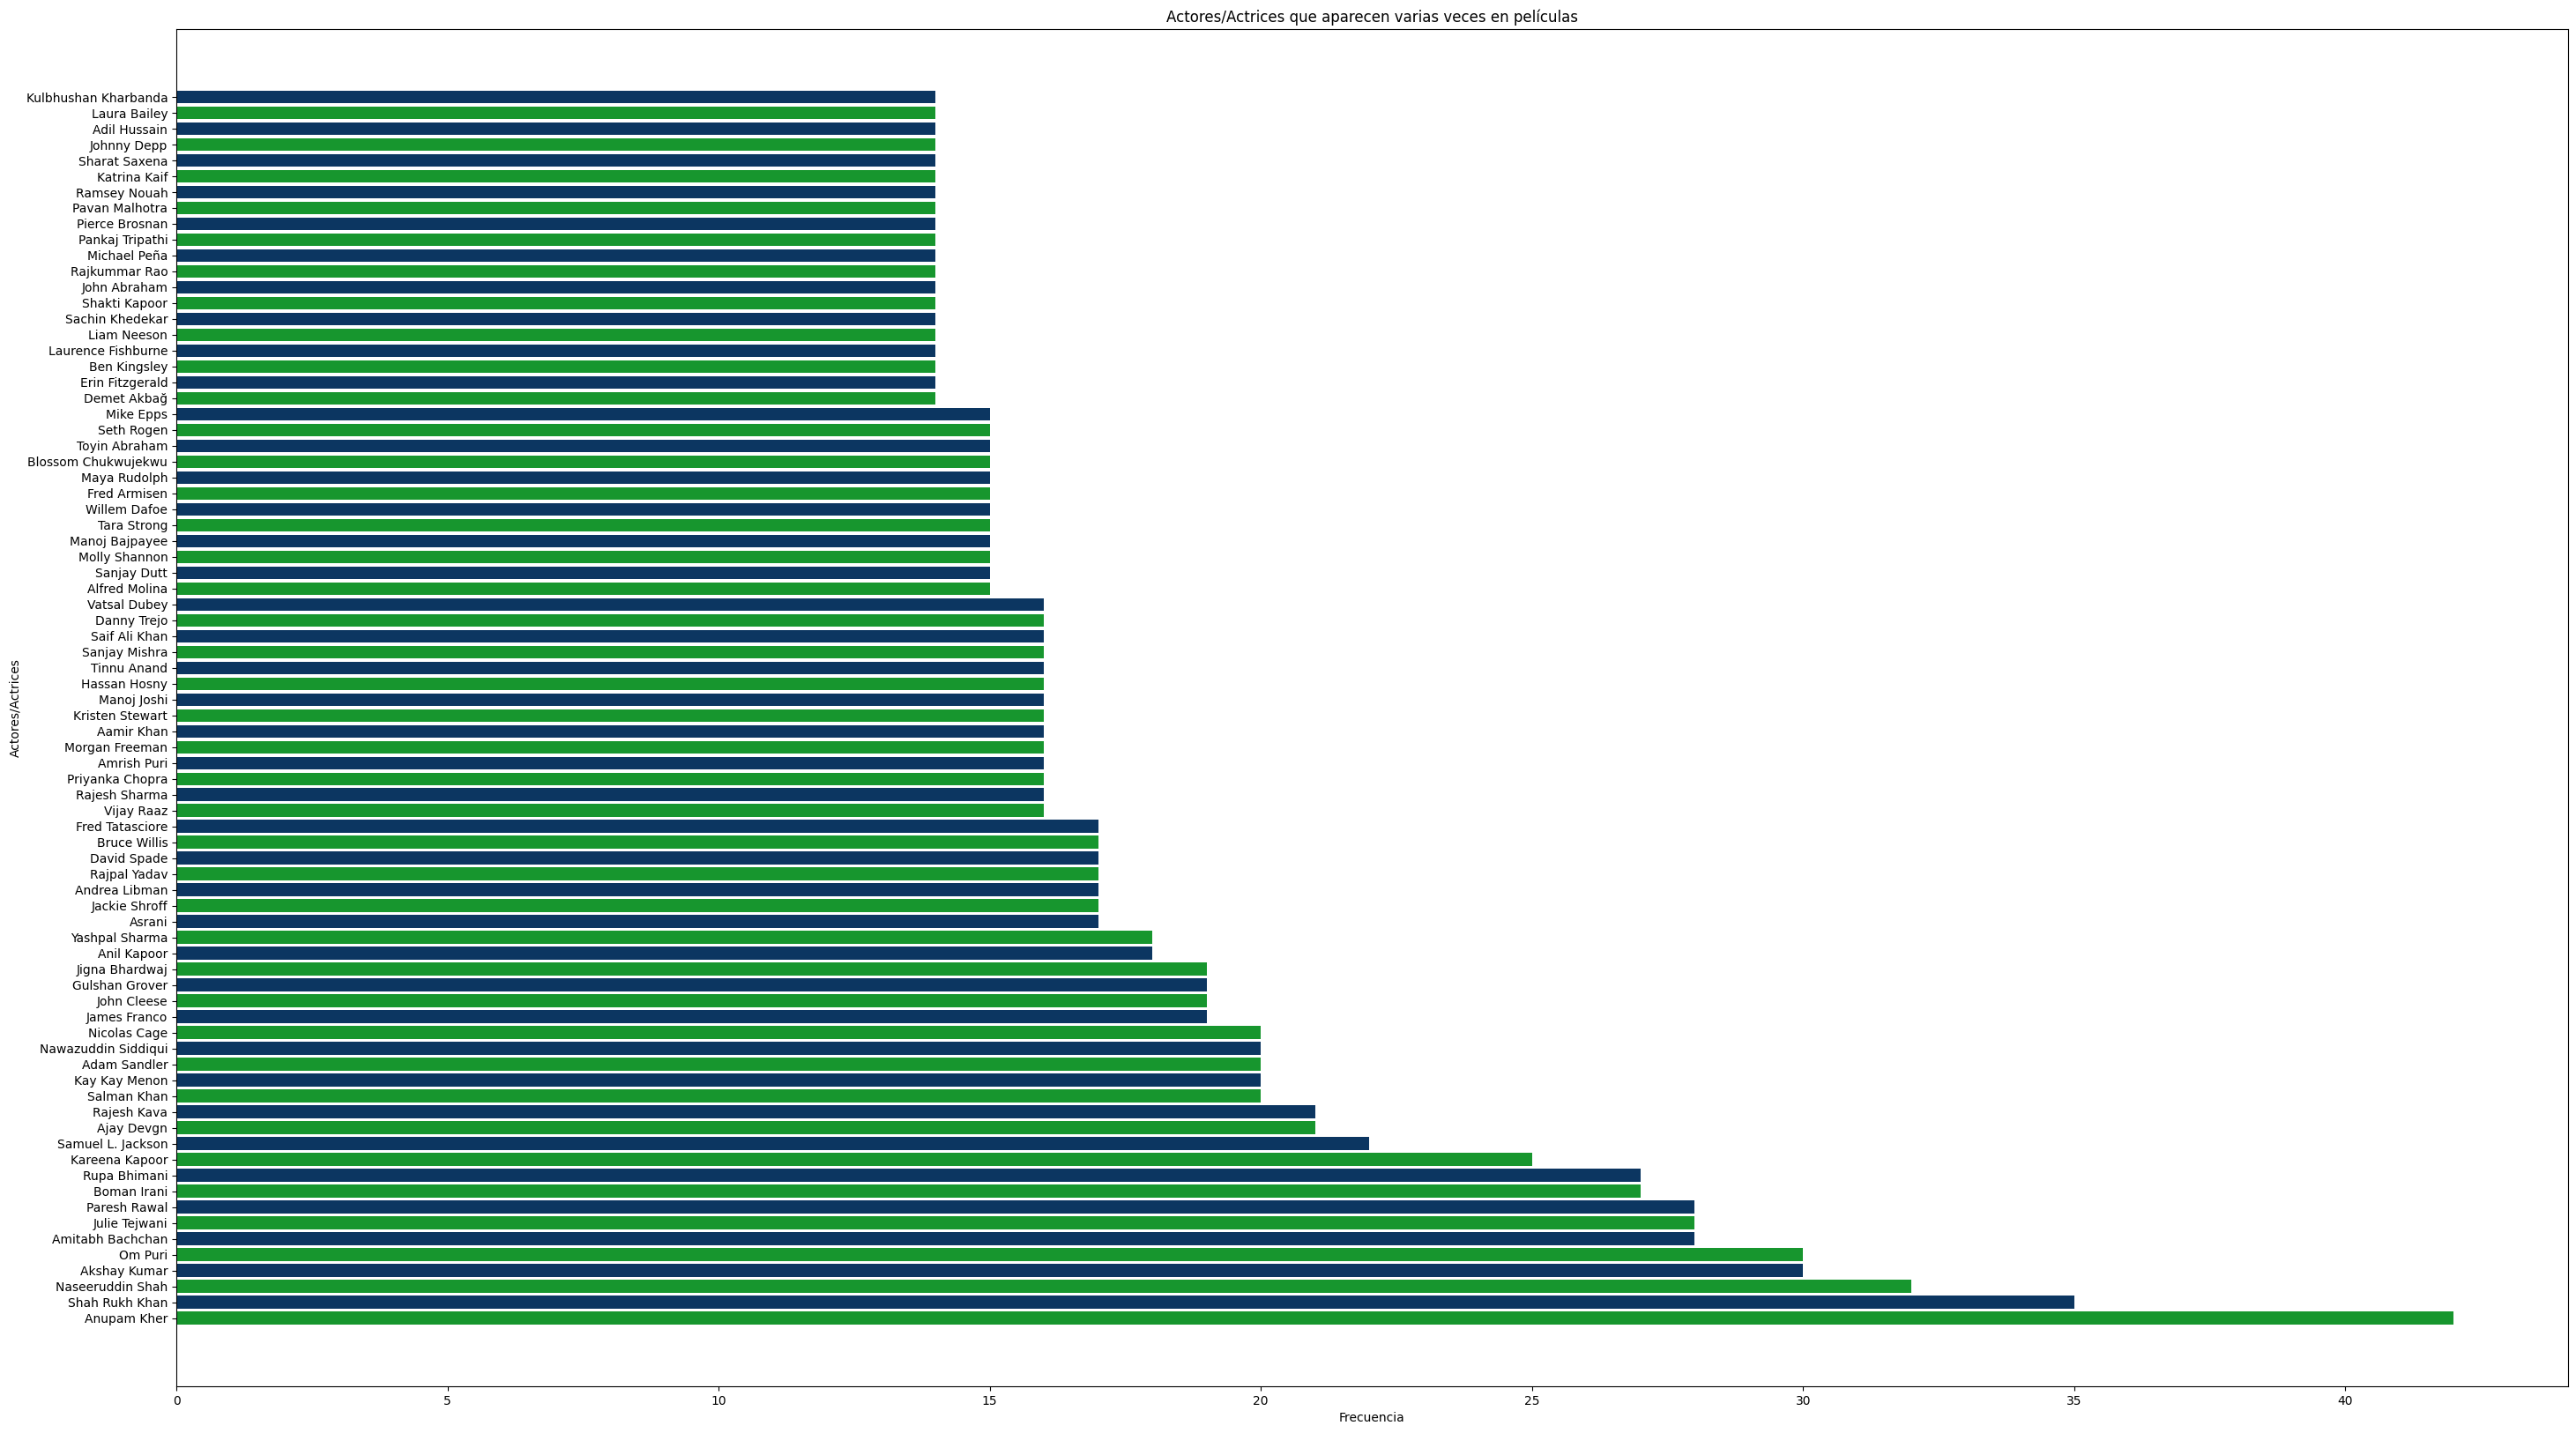

In [14]:
Actores_Comunes = ObjetoGraficas.ResultadoProcesamiento[ObjetoGraficas.ResultadoProcesamiento >= 14]

ObjetoGraficas.GraficaBarras('#17962e', '#0c3661', "Frecuencia", "Actores/Actrices", "Actores/Actrices que aparecen varias veces en películas", Actores_Comunes, 35, 20)

In [15]:
#Columan: director
ObjetoGraficas.ProcesarColumnasDataset(ObjetoDataset.Peliculas["director"])

ObjetoGraficas.ResultadoProcesamiento.head(10)

Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: director, dtype: int64

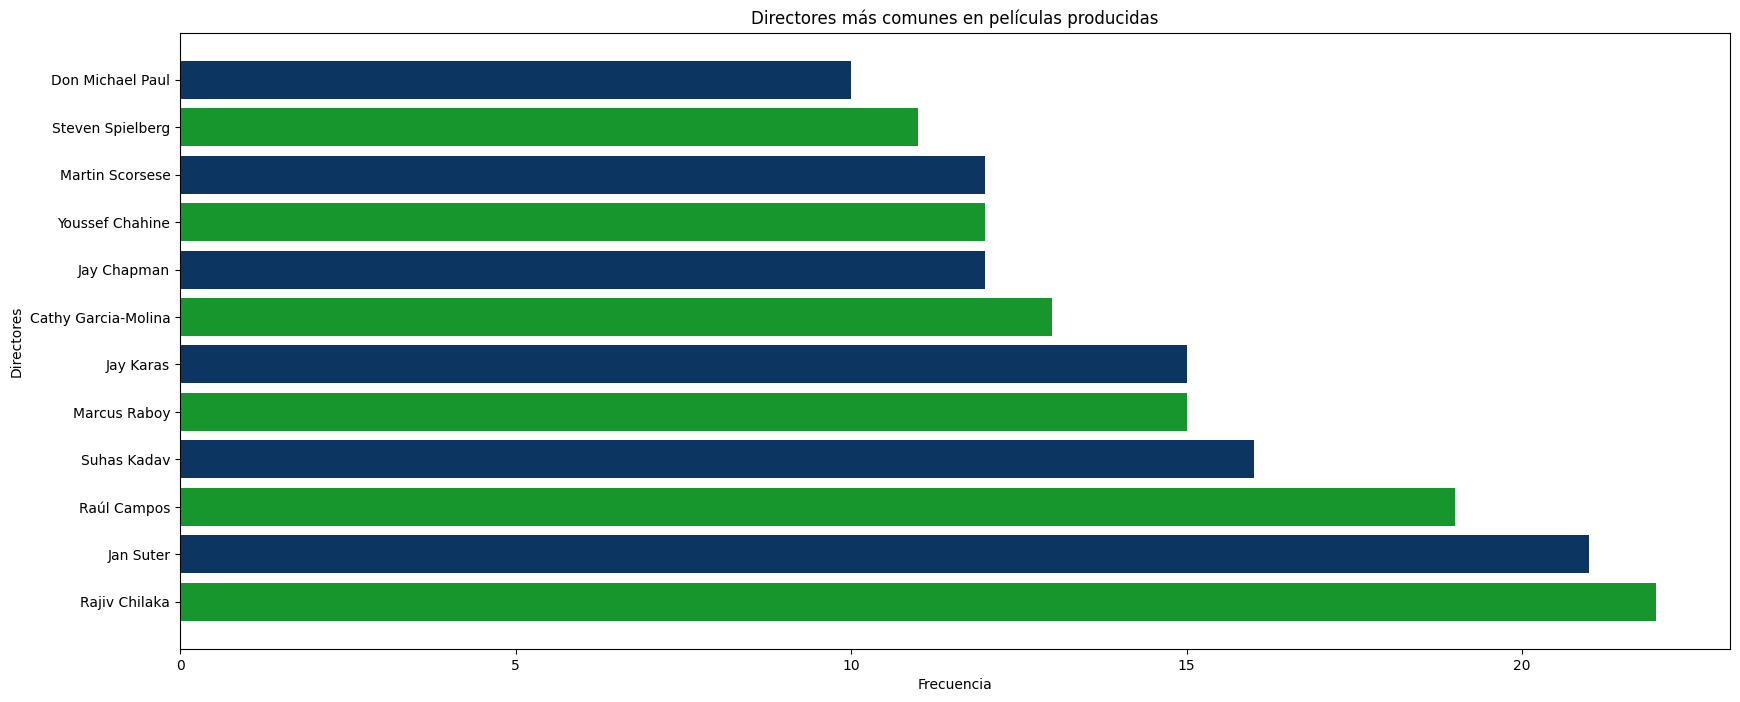

In [16]:
Directores_Comunes = ObjetoGraficas.ResultadoProcesamiento[ObjetoGraficas.ResultadoProcesamiento >= 10]

ObjetoGraficas.GraficaBarras('#17962e', '#0c3661', "Frecuencia", "Directores", "Directores más comunes en películas producidas", Directores_Comunes, 20, 8)

In [17]:
#Columna: listed_in
ObjetoGraficas.ProcesarColumnasDataset(ObjetoDataset.Peliculas["listed_in"])

ObjetoGraficas.ResultadoProcesamiento.head(10)

International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: listed_in, dtype: int64

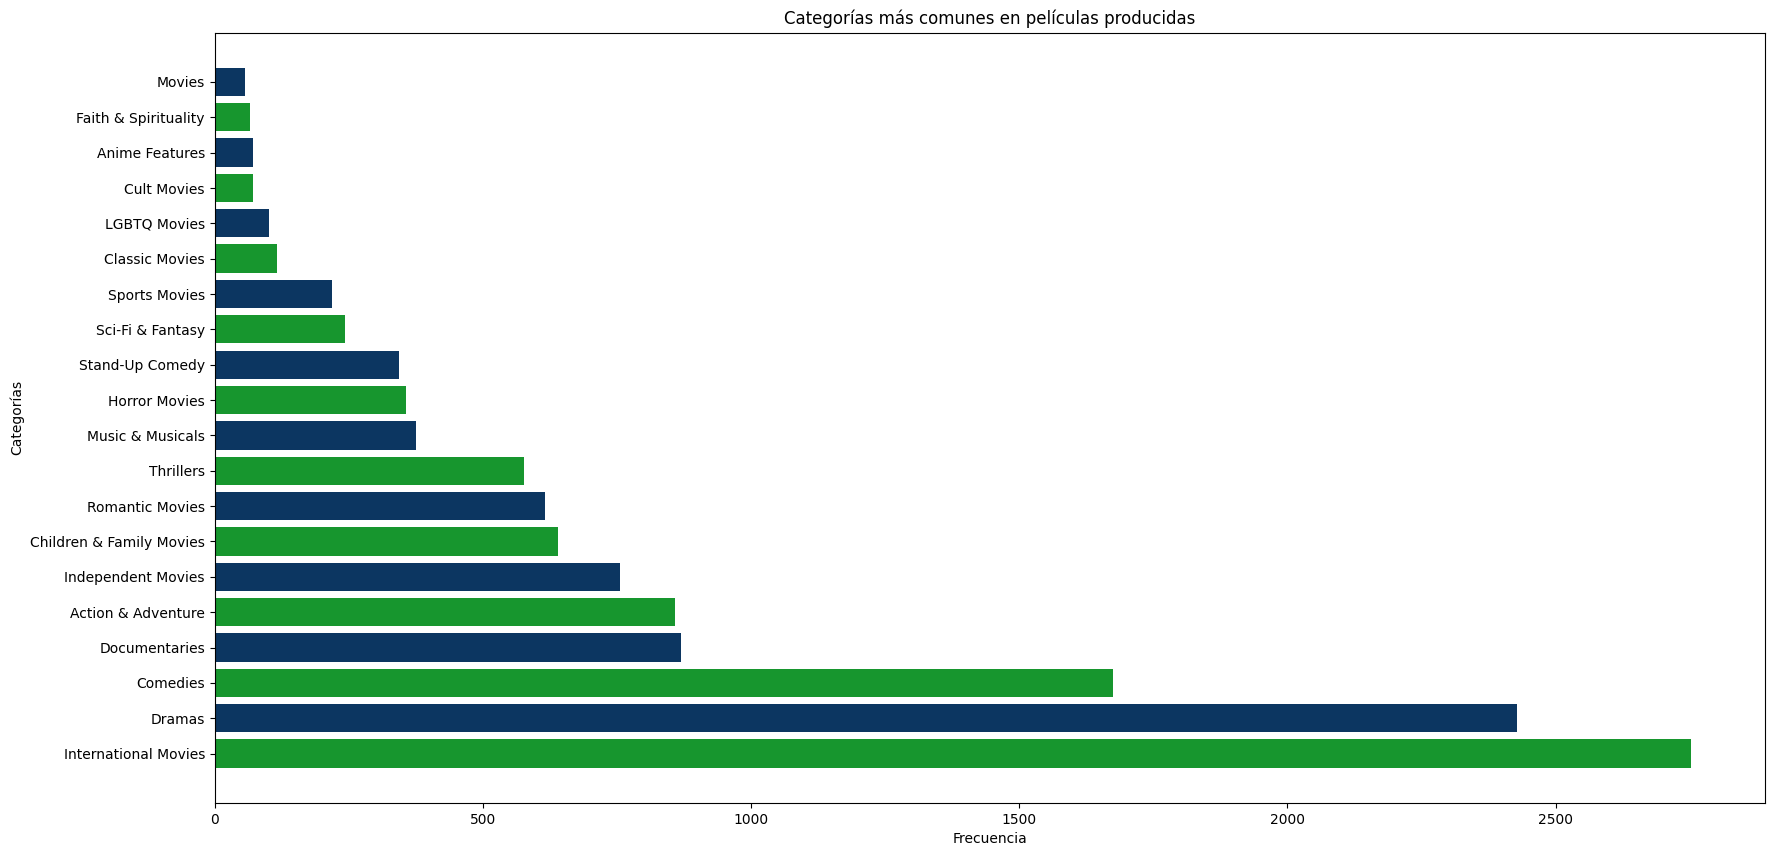

In [18]:
Categorias_Comunes = ObjetoGraficas.ResultadoProcesamiento

ObjetoGraficas.GraficaBarras('#17962e', '#0c3661', "Frecuencia", "Categorías", "Categorías más comunes en películas producidas", Categorias_Comunes, 20, 10)

In [19]:
#Columna: rating
ObjetoGraficas.ProcesarSimpleColumna(ObjetoDataset.Peliculas["rating"])

ObjetoGraficas.ResultadoValores.head(10)

TV-MA    2062
TV-14    1427
R         797
TV-PG     540
PG-13     490
PG        287
TV-Y7     139
TV-Y      131
TV-G      126
NR         75
Name: rating, dtype: int64

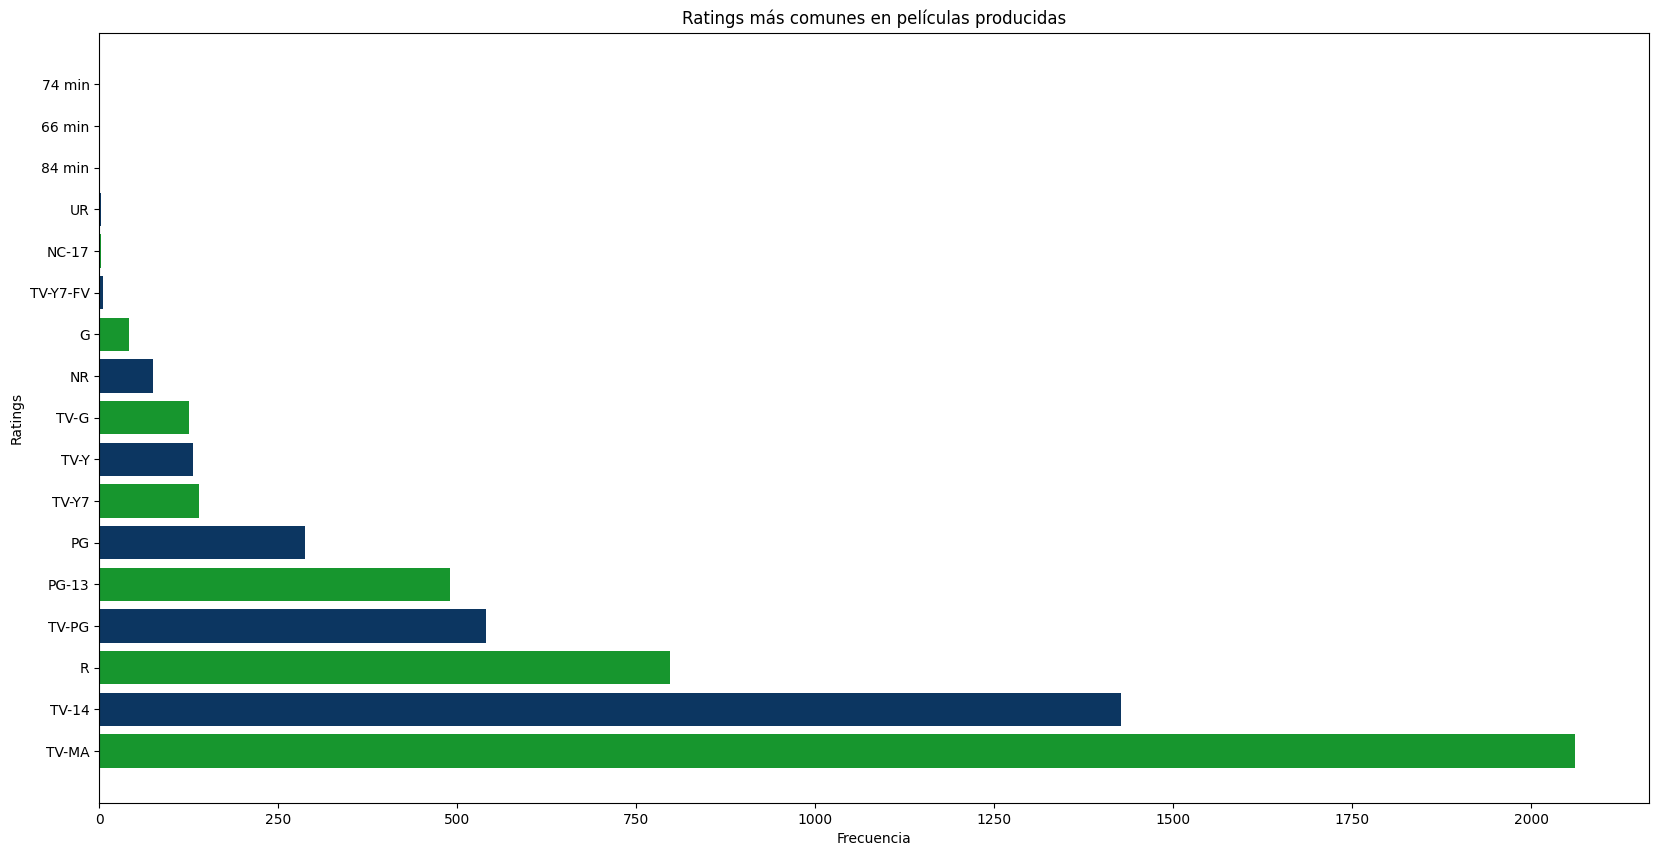

In [20]:
Clasificaciones_Comunes = ObjetoGraficas.ResultadoValores

ObjetoGraficas.GraficaBarras('#17962e', '#0c3661', "Frecuencia", "Ratings", "Ratings más comunes en películas producidas", Clasificaciones_Comunes, 20, 10)

In [21]:
#Columna: country
ObjetoGraficas.ProcesarColumnasDataset(ObjetoDataset.Peliculas["country"])

ObjetoGraficas.ResultadoProcesamiento.head(20)

United States     2752
India              962
United Kingdom     534
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
Mexico             111
Egypt              102
Hong Kong          100
Australia           94
Nigeria             94
Indonesia           86
Turkey              83
Philippines         80
Belgium             78
Italy               75
Argentina           71
Name: country, dtype: int64

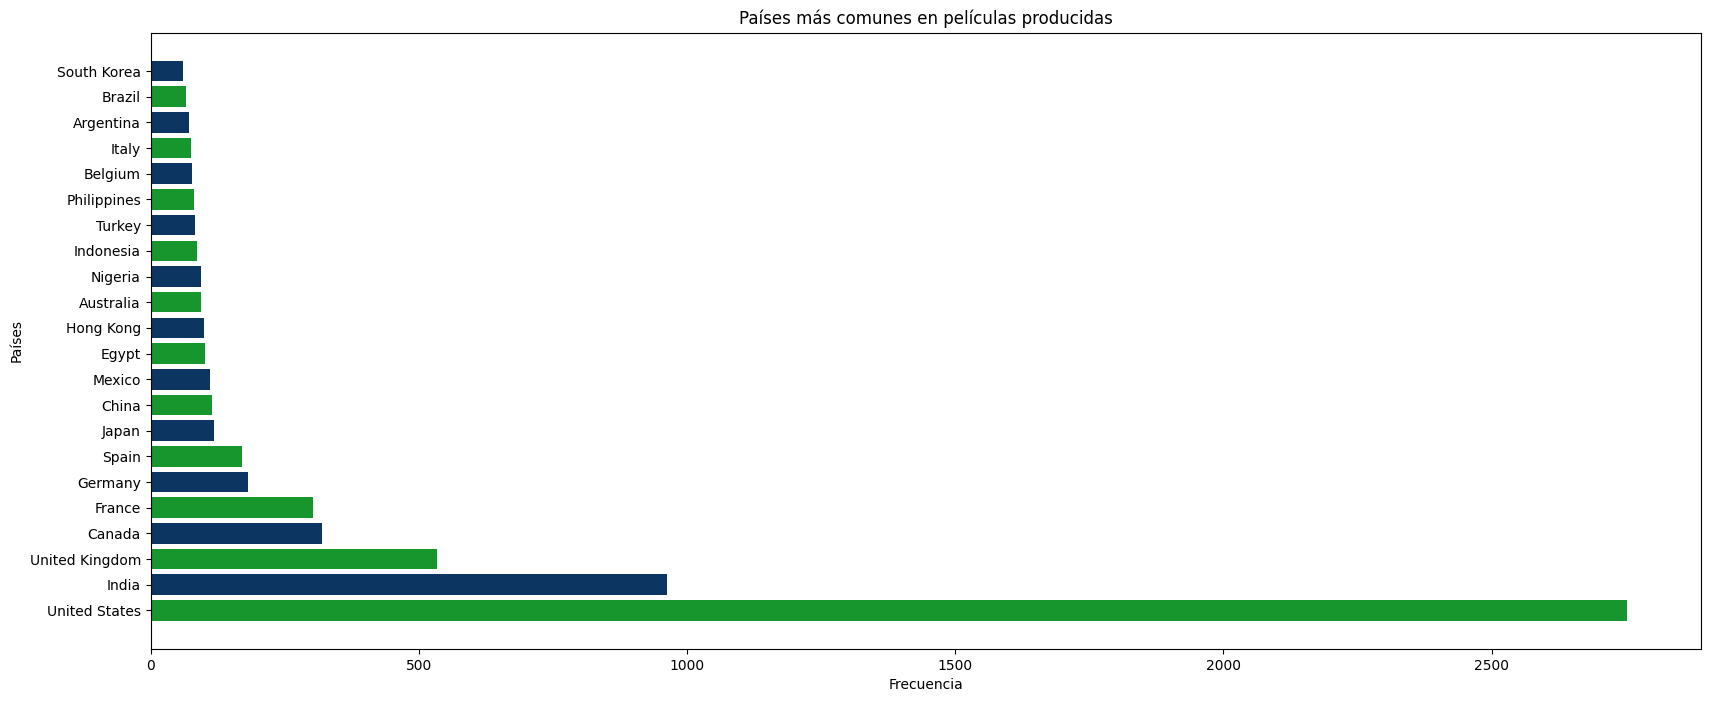

In [22]:
Paises_Comunes = ObjetoGraficas.ResultadoProcesamiento[ObjetoGraficas.ResultadoProcesamiento >= 60]

ObjetoGraficas.GraficaBarras('#17962e', '#0c3661', "Frecuencia", "Países", "Países más comunes en películas producidas", Paises_Comunes, 20, 8)

In [23]:
#Columna: duration
ObjetoGraficas.ProcesarSimpleColumna(ObjetoDataset.Peliculas["duration"])

ObjetoGraficas.ResultadoValores.head(15)

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
95 min     137
96 min     130
92 min     129
102 min    122
98 min     120
99 min     118
88 min     116
101 min    116
103 min    114
106 min    111
Name: duration, dtype: int64

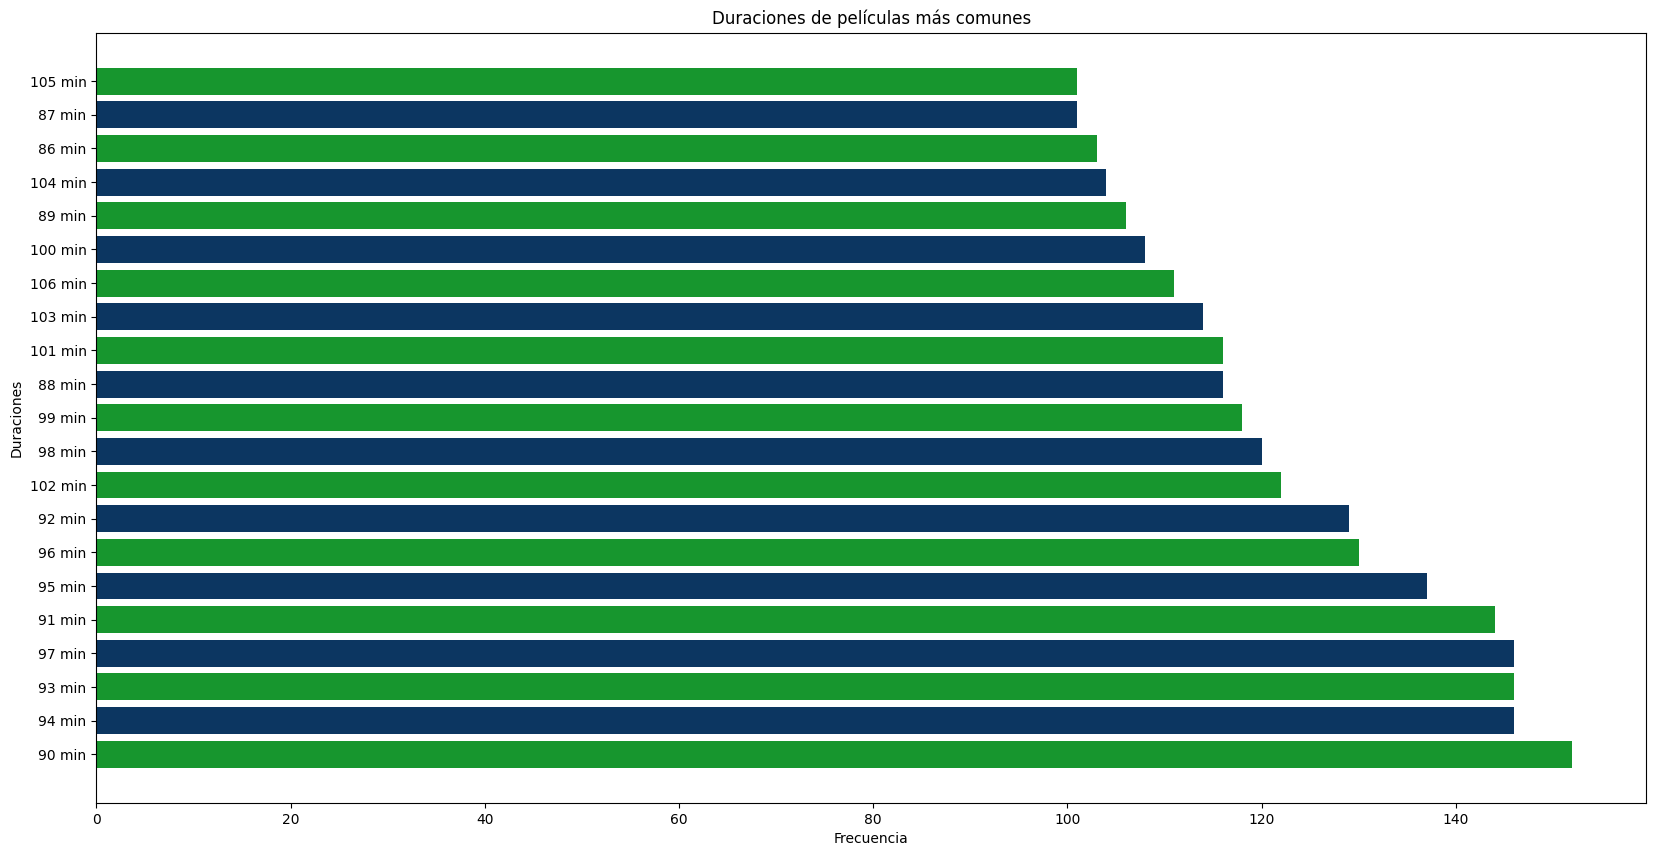

In [24]:
Duraciones_Comunes = ObjetoGraficas.ResultadoValores[ObjetoGraficas.ResultadoValores >= 100]

ObjetoGraficas.GraficaBarras('#17962e', '#0c3661', "Frecuencia", "Duraciones", "Duraciones de películas más comunes", Duraciones_Comunes, 20, 10)

In [25]:
#Columna: release_year
ObjetoGraficas.ProcesarSimpleColumna(ObjetoDataset.Peliculas["release_year"])

ObjetoGraficas.ResultadoValores.head(15)

2018    767
2017    767
2016    658
2019    633
2020    517
2015    398
2021    277
2014    264
2013    225
2012    173
2010    154
2011    145
2009    118
2008    113
2006     82
Name: release_year, dtype: int64

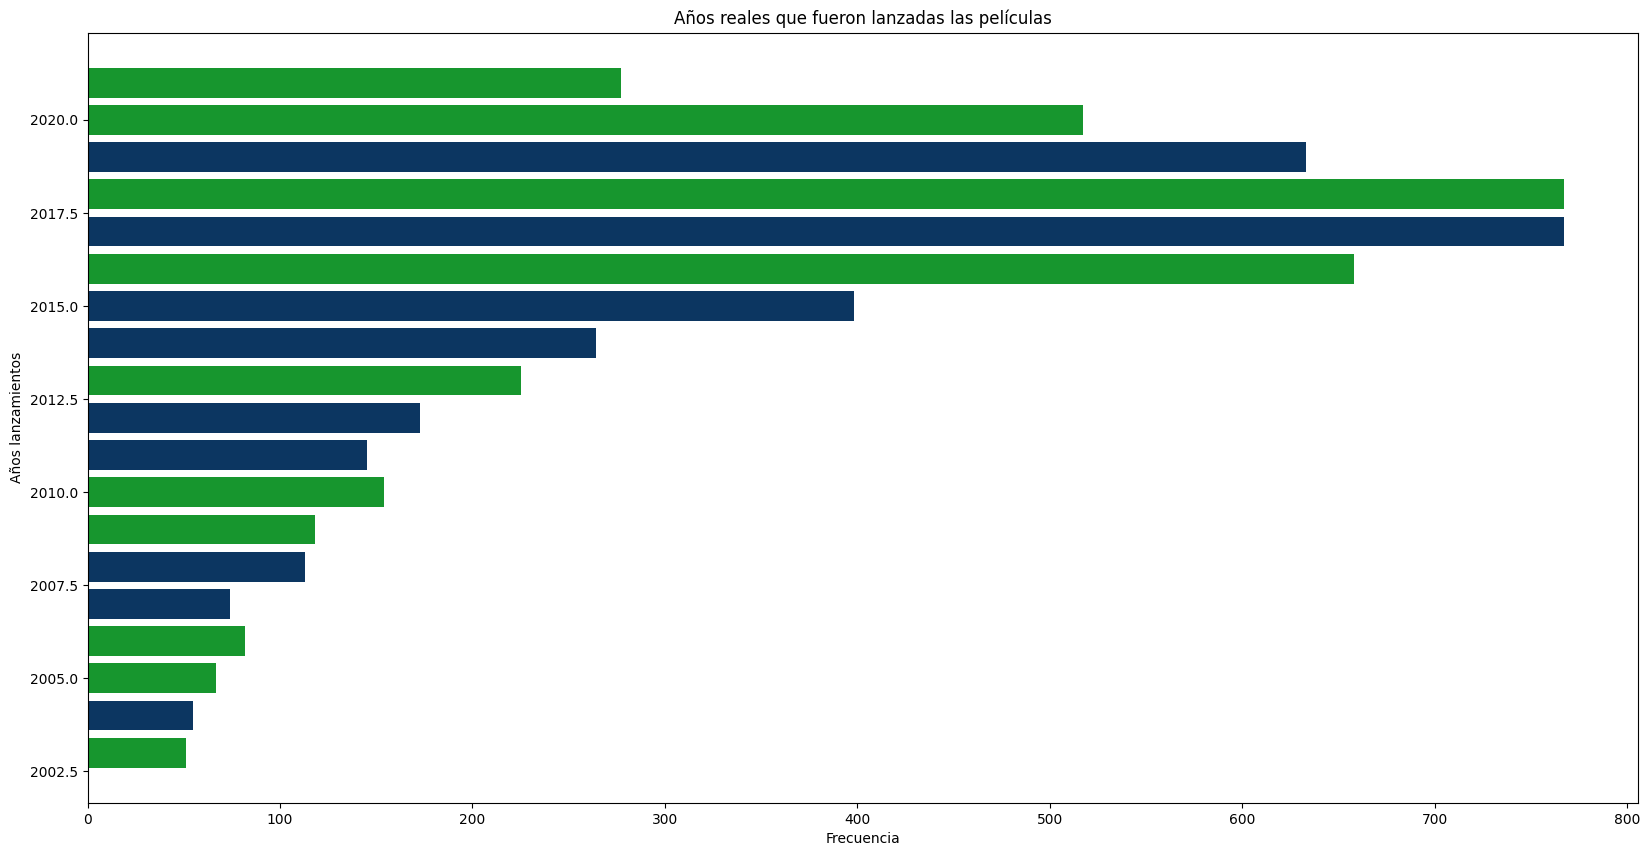

In [26]:
Años_Comunes = ObjetoGraficas.ResultadoValores[ObjetoGraficas.ResultadoValores >= 50]

ObjetoGraficas.GraficaBarras('#17962e', '#0c3661', "Frecuencia", "Años lanzamientos", "Años reales que fueron lanzadas las películas", Años_Comunes, 20, 10)

In [27]:
#Columna: date_added
ObjetoGraficas.ProcesarSimpleColumna(ObjetoDataset.Peliculas["date_added"])

ObjetoGraficas.ResultadoValores.head(15)

January 1, 2020      97
November 1, 2019     75
March 1, 2018        72
December 31, 2019    67
October 1, 2018      64
November 1, 2018     55
July 1, 2021         53
October 1, 2019      51
September 1, 2021    48
January 1, 2018      47
July 1, 2019         43
June 2, 2021         42
January 1, 2021      41
April 1, 2018        38
July 1, 2018         38
Name: date_added, dtype: int64

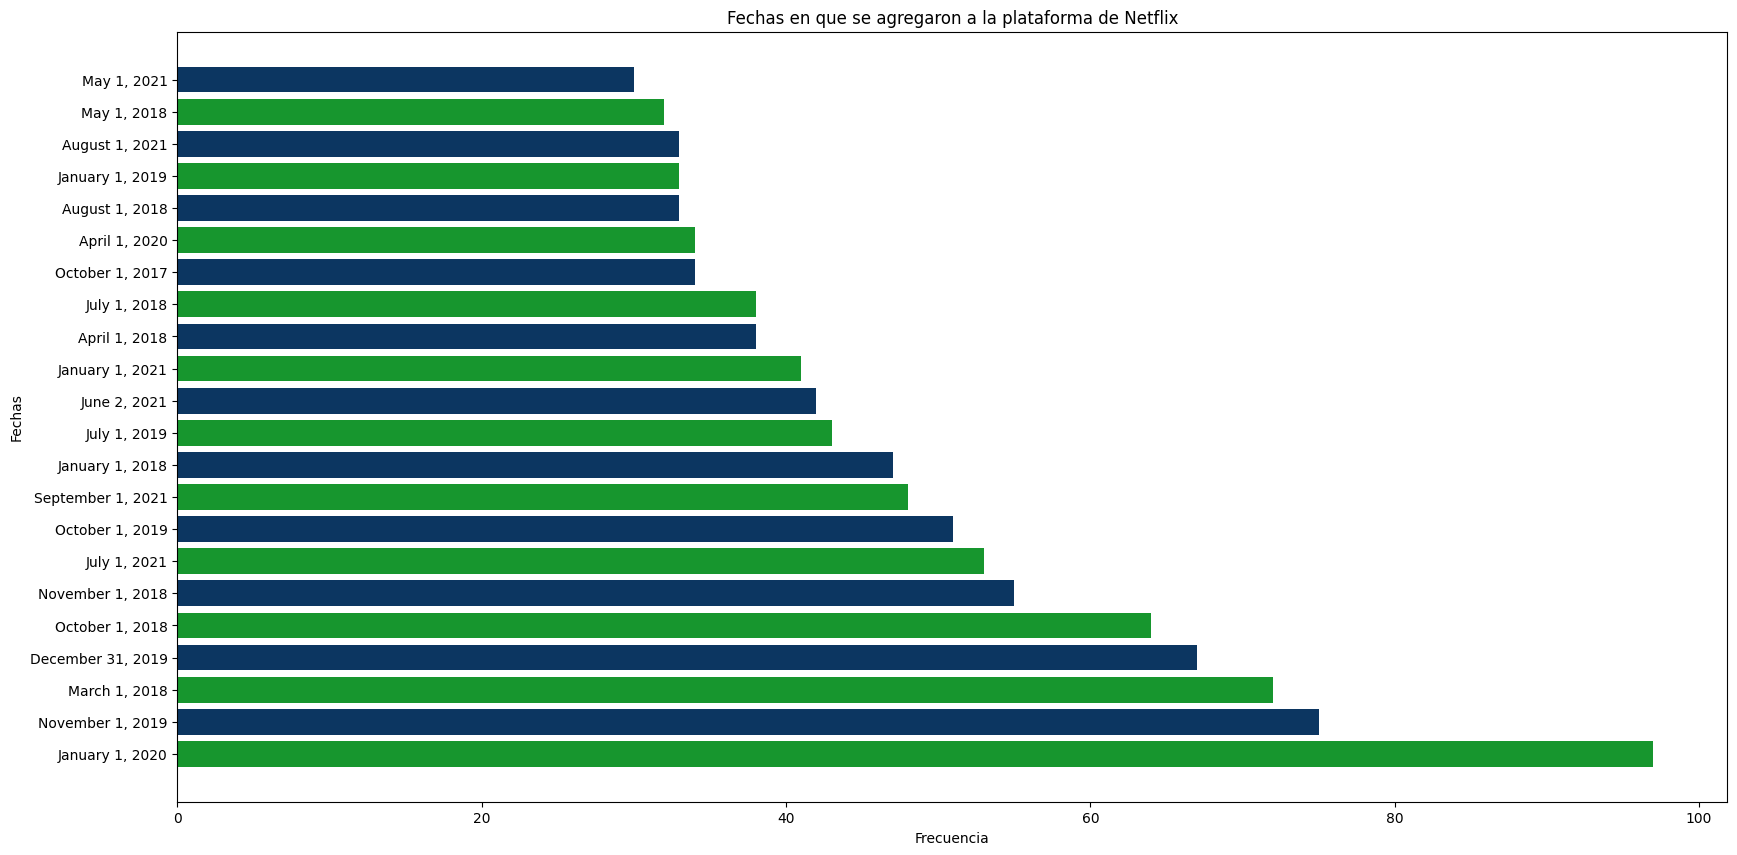

In [28]:
Fechas_Comunes = ObjetoGraficas.ResultadoValores[ObjetoGraficas.ResultadoValores >= 30]

ObjetoGraficas.GraficaBarras('#17962e', '#0c3661', "Frecuencia", "Fechas", "Fechas en que se agregaron a la plataforma de Netflix", Fechas_Comunes, 20, 10)

En todos estos bloques observados, se están sacando las cantidad de valores totales por cada columna que conserve el dataset de películas. De lo anterior, se realiza el proceso las variables cast, director, rating, duration, country, release_year, date_added y listed_in. Ciertamente, algunos conservan condiciones porque los resultados son bastante extensos para ser representados en la gráfica de barras. Por lo tanto, se obtienen los datos más comunes que muestran un factor diferenciador de los demás. Finalmente, se imprimen en la gráfica. 

### 2.4.2. Dataset series de televisión

In [29]:
Condicion = ObjetoDataset.Archivo["type"] == "TV Show"

Df_peliculas = ObjetoDataset.Archivo.loc[Condicion, :]

ObjetoDataset.TipoSeries(Df_peliculas)

ObjetoDataset.SeriesTelevison.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


Obteniendo del dataset original los datos relacionados a series de televisión. Posteriormente, se imprimen los primeros cinco resultados del nuevo dataset. 

In [30]:
Nulos_Series = ObjetoDataset.ValoresNulosTipo(ObjetoDataset.SeriesTelevison)

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64


Obteniendo los valores nulos que contiene el dataset de series de televisión. 

In [31]:
#Columna: listed_in
ObjetoGraficas.ProcesarColumnasDataset(ObjetoDataset.SeriesTelevison["listed_in"])

ObjetoGraficas.ResultadoProcesamiento.head(10)

International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Docuseries                 395
Romantic TV Shows          370
Reality TV                 255
British TV Shows           253
Anime Series               176
Name: listed_in, dtype: int64

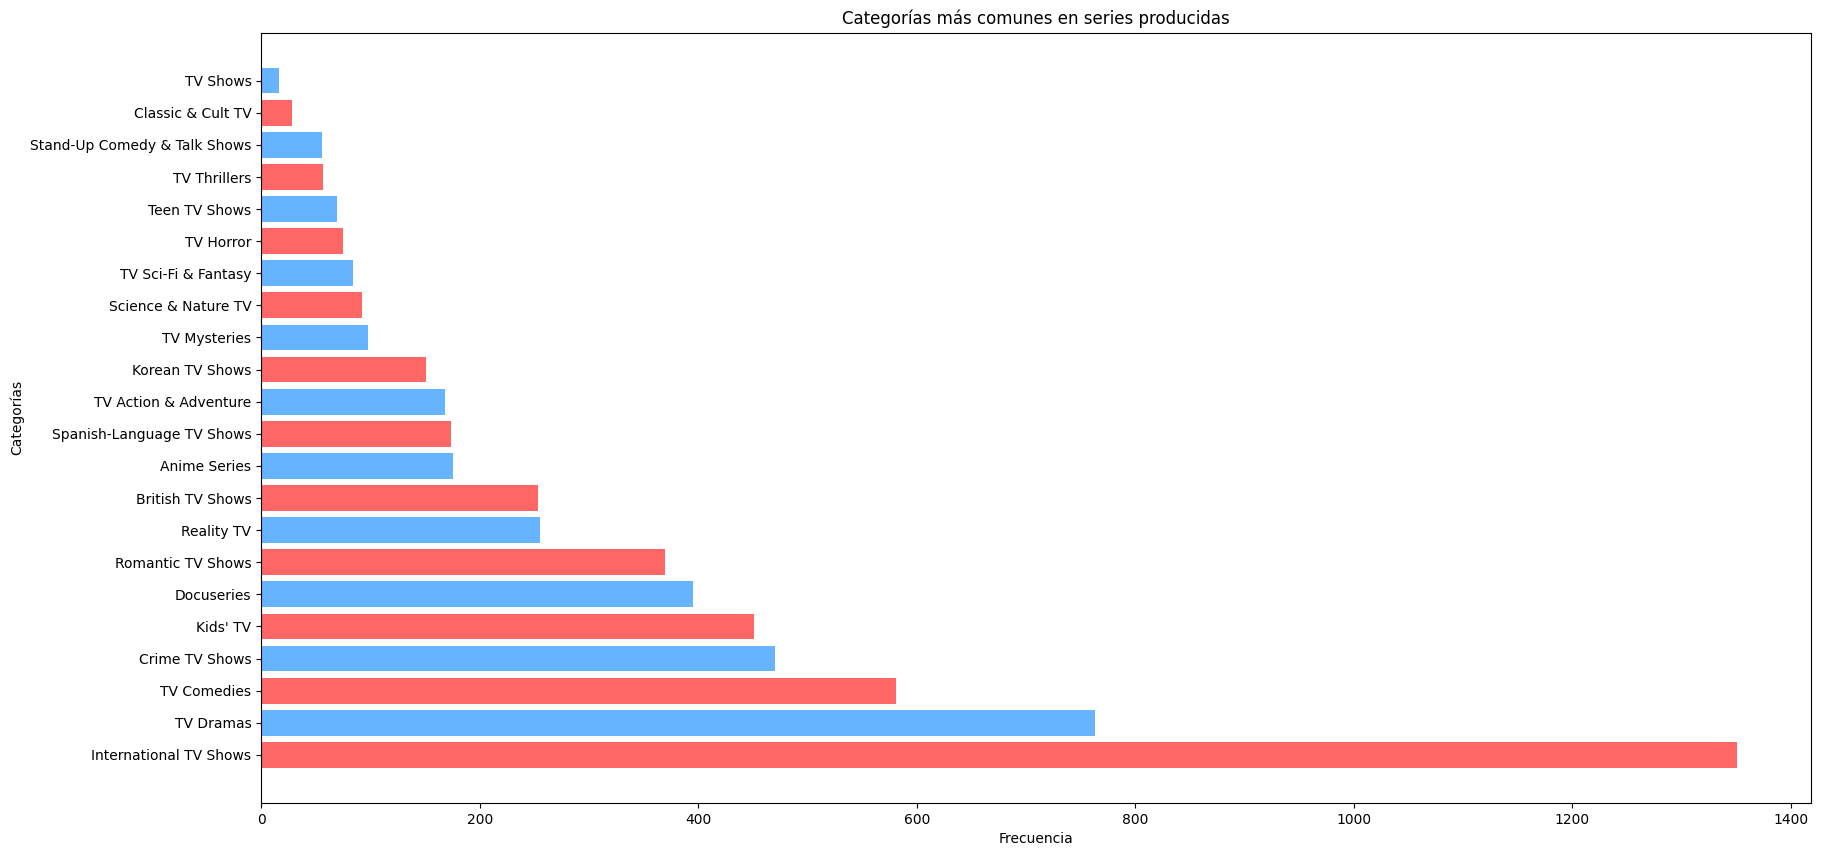

In [32]:
Categorias_Comunes_S = ObjetoGraficas.ResultadoProcesamiento

ObjetoGraficas.GraficaBarras('#ff6666', '#66b3ff', "Frecuencia", "Categorías", "Categorías más comunes en series producidas", Categorias_Comunes_S, 20, 10)

In [33]:
#Columna: rating
ObjetoGraficas.ProcesarSimpleColumna(ObjetoDataset.SeriesTelevison["rating"])

ObjetoGraficas.ResultadoValores

TV-MA       1145
TV-14        733
TV-PG        323
TV-Y7        195
TV-Y         176
TV-G          94
NR             5
R              2
TV-Y7-FV       1
Name: rating, dtype: int64

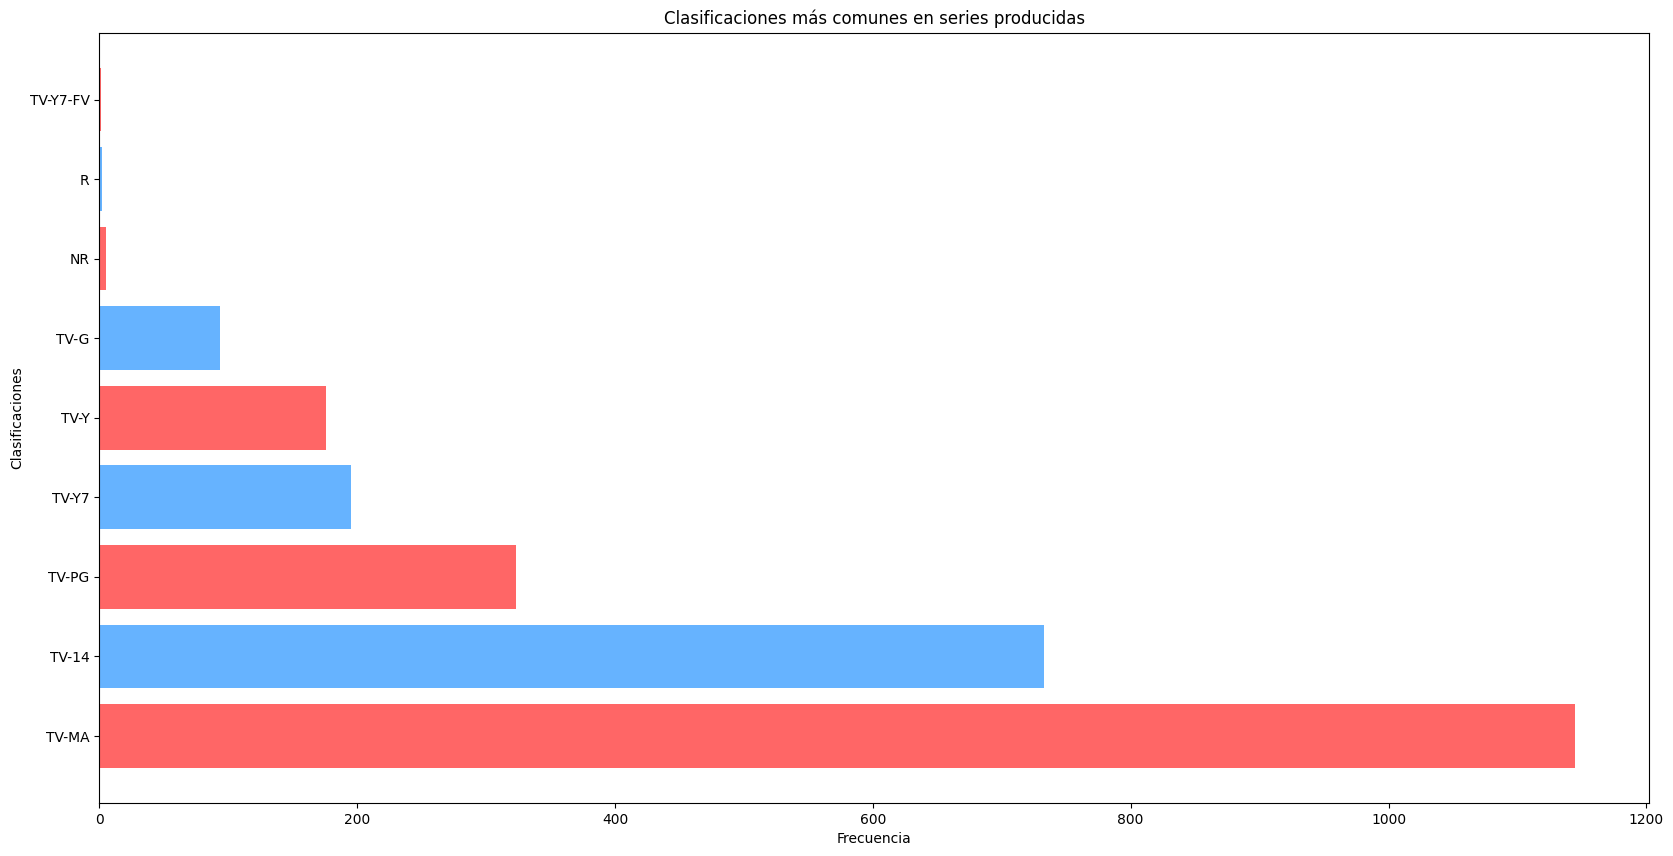

In [34]:
Rating_Comunes_S = ObjetoGraficas.ResultadoValores

ObjetoGraficas.GraficaBarras('#ff6666', '#66b3ff', "Frecuencia", "Clasificaciones", "Clasificaciones más comunes en series producidas", Rating_Comunes_S, 20, 10)

In [35]:
#Columna: country
ObjetoGraficas.ProcesarColumnasDataset(ObjetoDataset.SeriesTelevison["country"])

ObjetoGraficas.ResultadoProcesamiento.head(10)

United States     938
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
Spain              61
Name: country, dtype: int64

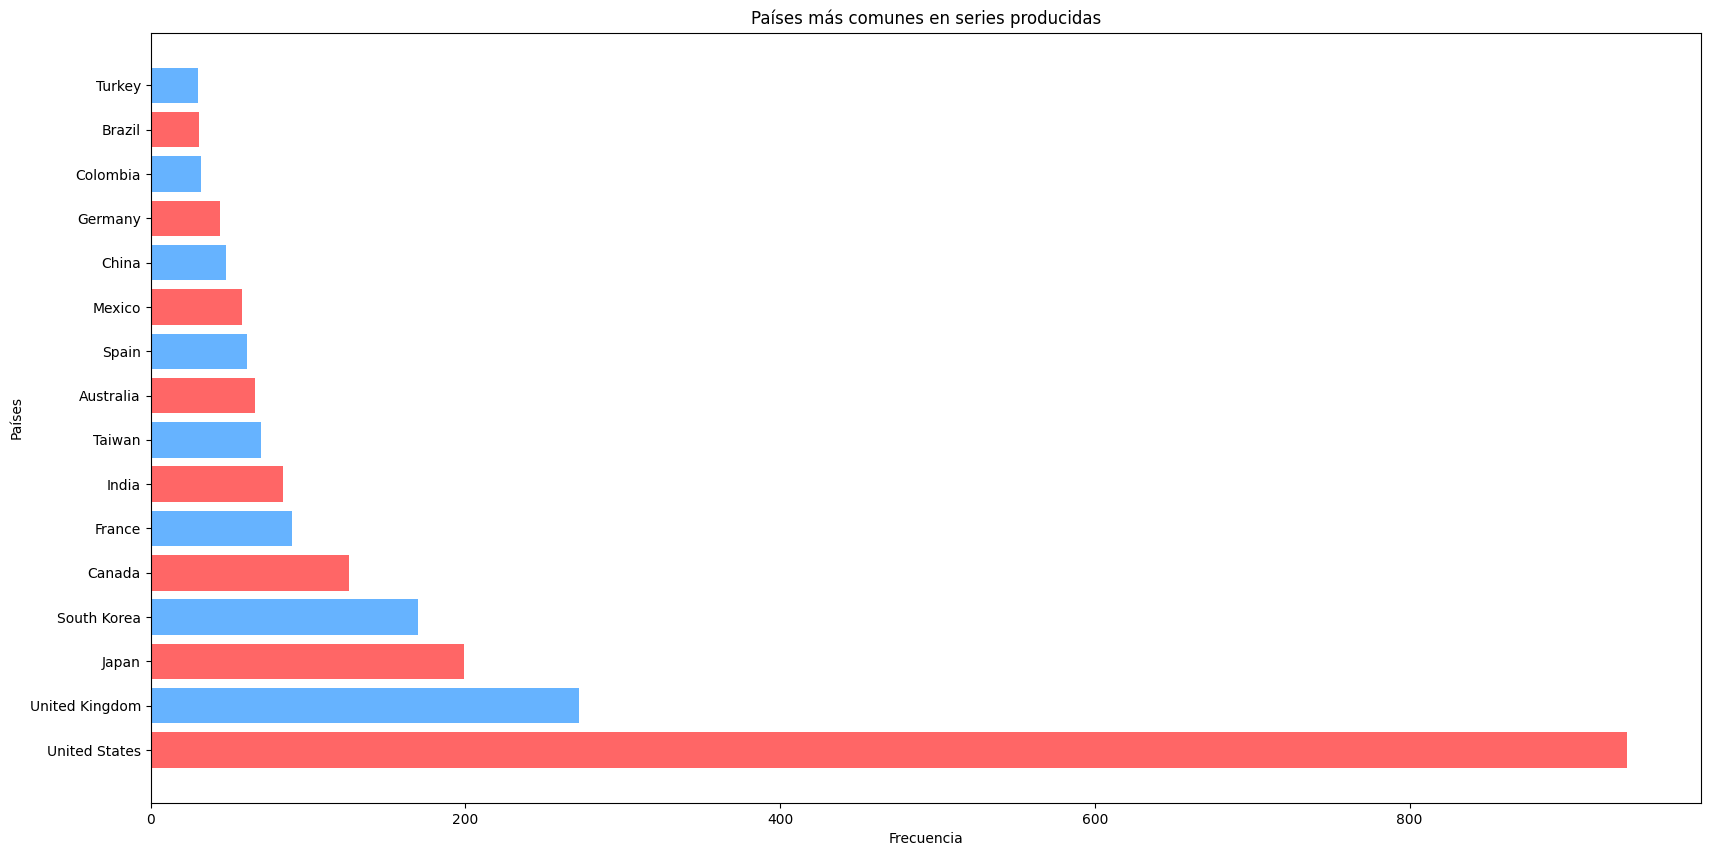

In [36]:
Paises_Comunes_S = ObjetoGraficas.ResultadoProcesamiento[ObjetoGraficas.ResultadoProcesamiento>=30]

ObjetoGraficas.GraficaBarras('#ff6666', '#66b3ff', "Frecuencia", "Países", "Países más comunes en series producidas", Paises_Comunes_S, 20, 10)

In [37]:
#Columna: cast
ObjetoGraficas.ProcesarColumnasDataset(ObjetoDataset.SeriesTelevison["cast"])

ObjetoGraficas.ResultadoProcesamiento.head(10)

Takahiro Sakurai      25
Yuki Kaji             19
Ai Kayano             17
Daisuke Ono           17
Junichi Suwabe        17
Yuichi Nakamura       16
Jun Fukuyama          15
Yoshimasa Hosoya      15
David Attenborough    14
Mamoru Miyano         13
Name: cast, dtype: int64

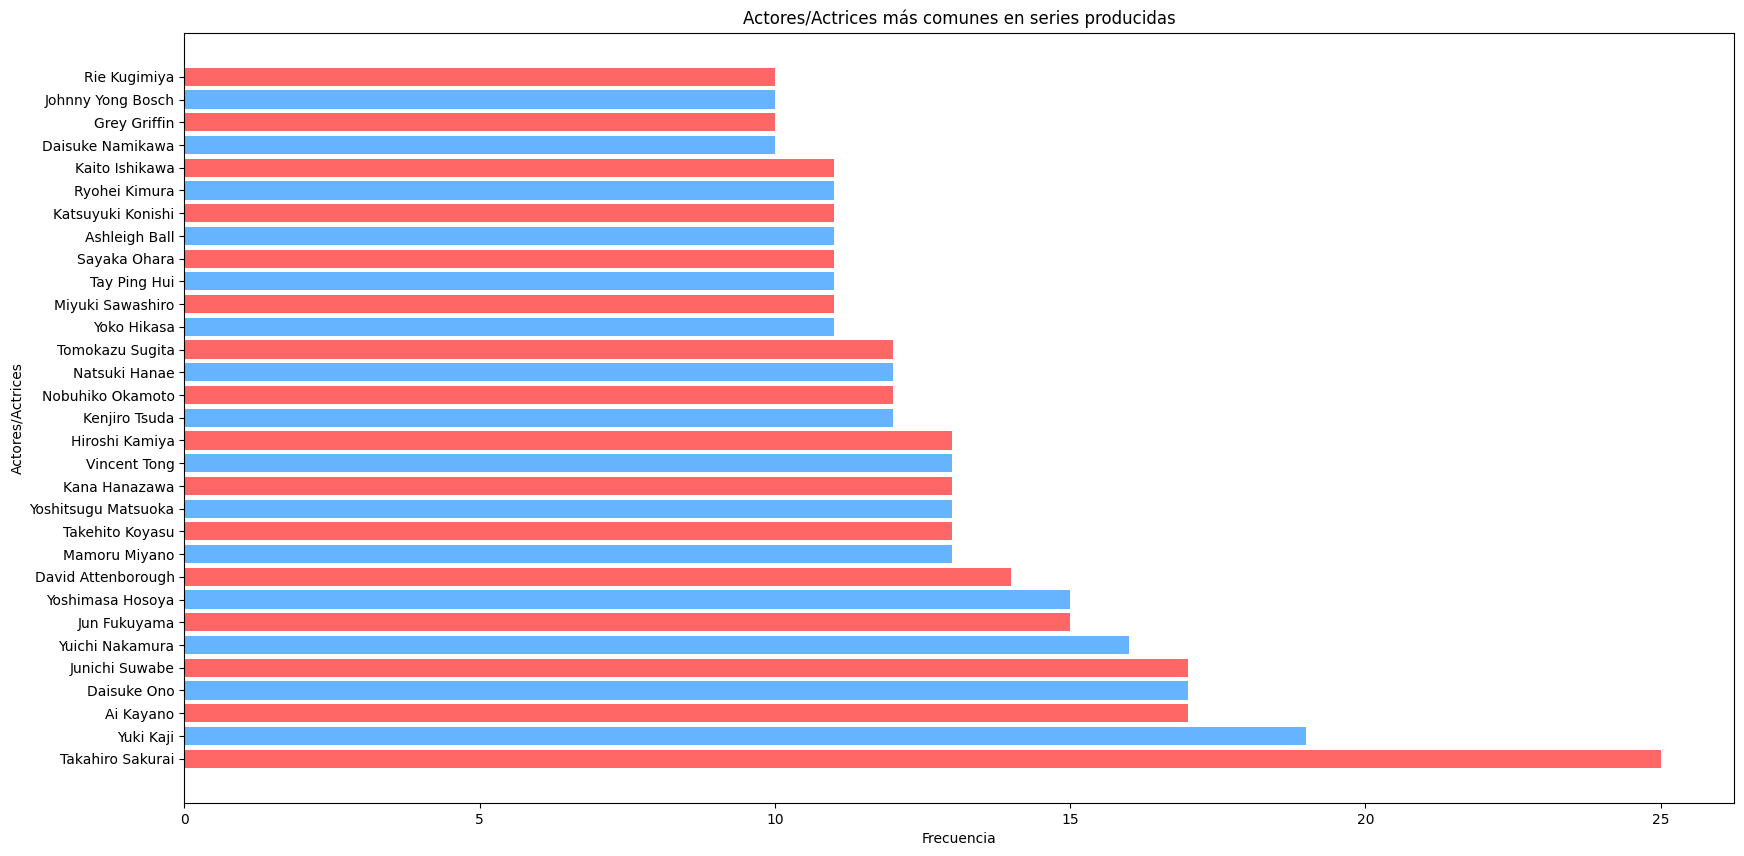

In [38]:
Actores_Comunes_S = ObjetoGraficas.ResultadoProcesamiento[ObjetoGraficas.ResultadoProcesamiento>=10]

ObjetoGraficas.GraficaBarras('#ff6666', '#66b3ff', "Frecuencia", "Actores/Actrices", "Actores/Actrices más comunes en series producidas", Actores_Comunes_S, 20, 10)

In [39]:
#Columna: duration
ObjetoGraficas.ProcesarSimpleColumna(ObjetoDataset.SeriesTelevison["duration"])

ObjetoGraficas.ResultadoValores

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
11 Seasons       2
12 Seasons       2
15 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

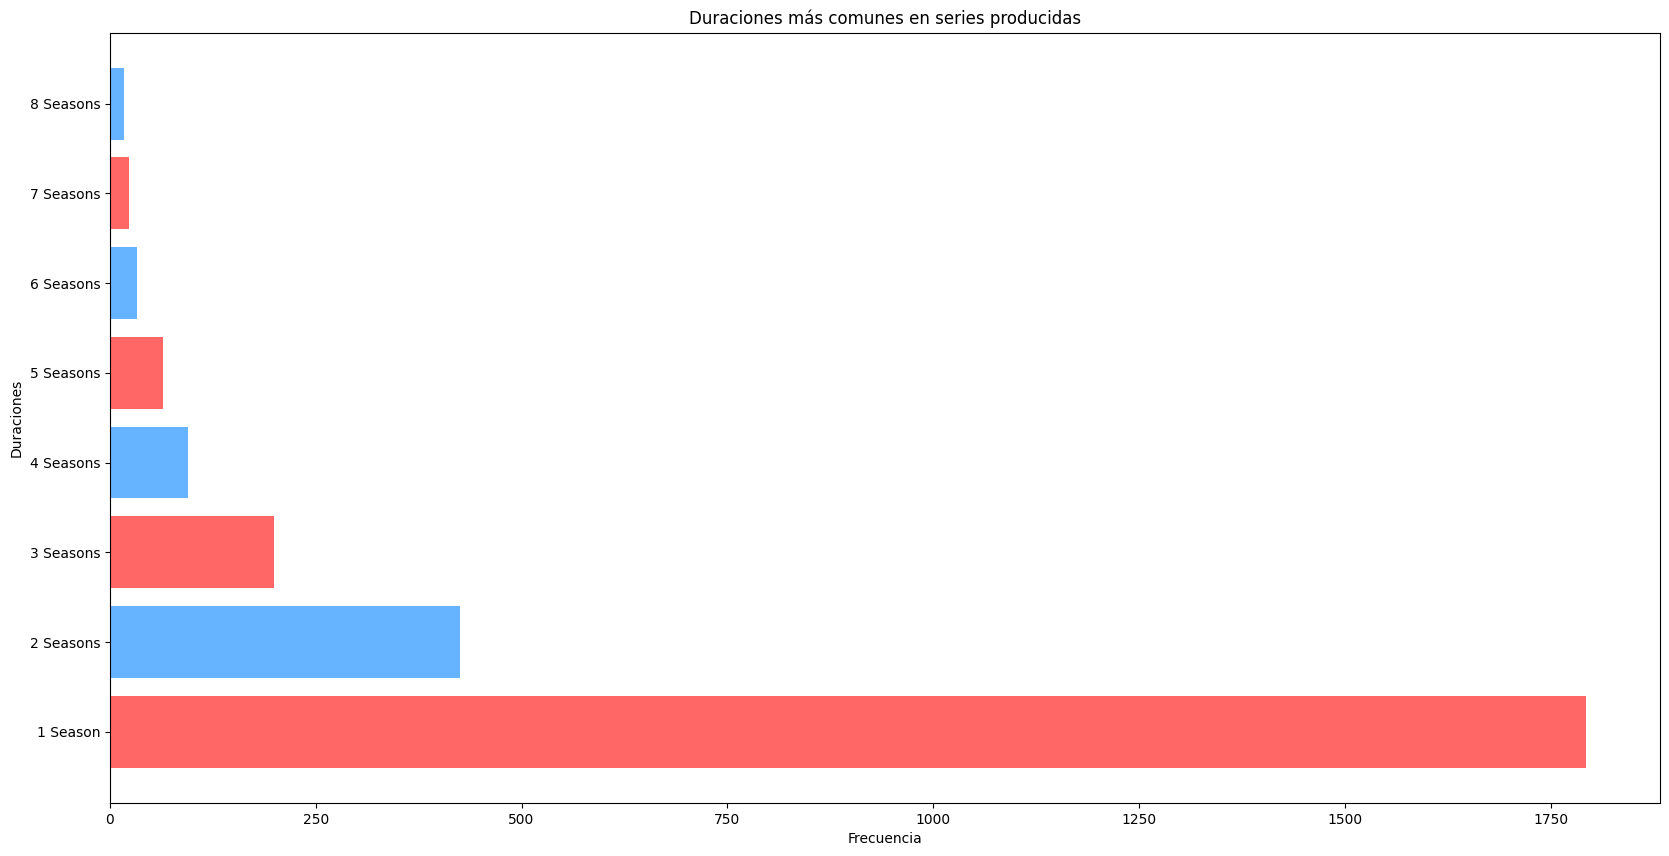

In [40]:
Duraciones_Comunes_S = ObjetoGraficas.ResultadoValores[ObjetoGraficas.ResultadoValores>=10]

ObjetoGraficas.GraficaBarras('#ff6666', '#66b3ff', "Frecuencia", "Duraciones", "Duraciones más comunes en series producidas", Duraciones_Comunes_S, 20, 10)

In [41]:
#Columna: release_year
ObjetoGraficas.ProcesarSimpleColumna(ObjetoDataset.SeriesTelevison["release_year"])

ObjetoGraficas.ResultadoValores.head(15)

2020    436
2019    397
2018    380
2021    315
2017    265
2016    244
2015    162
2014     88
2012     64
2013     63
2010     40
2011     40
2009     34
2008     23
2006     14
Name: release_year, dtype: int64

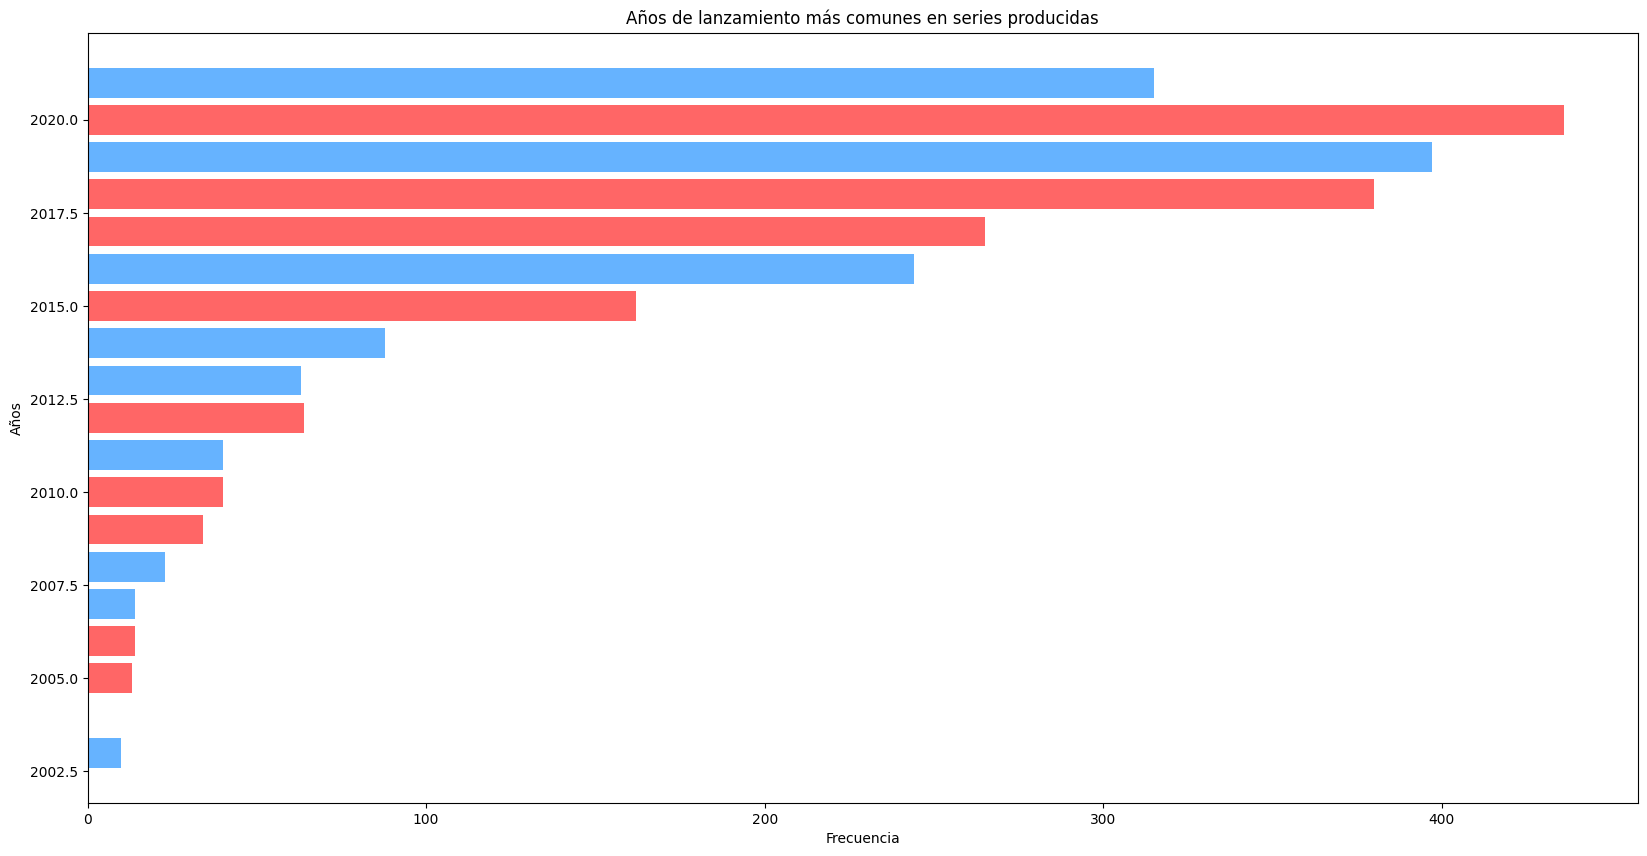

In [42]:
Años_Comunes_S = ObjetoGraficas.ResultadoValores[ObjetoGraficas.ResultadoValores>=10]

ObjetoGraficas.GraficaBarras('#ff6666', '#66b3ff', "Frecuencia", "Años", "Años de lanzamiento más comunes en series producidas", Años_Comunes_S, 20, 10)

In [43]:
#Columna: date_added
ObjetoGraficas.ProcesarSimpleColumna(ObjetoDataset.SeriesTelevison["date_added"])

ObjetoGraficas.ResultadoValores.head(15)

July 6, 2021         31
January 1, 2016      23
August 1, 2017       22
June 19, 2021        21
July 1, 2017         19
February 1, 2019     17
December 15, 2016    14
November 1, 2019     14
July 12, 2019        13
October 1, 2017      13
November 15, 2019    13
May 15, 2020         13
October 1, 2016      12
November 1, 2020     12
April 14, 2021       12
Name: date_added, dtype: int64

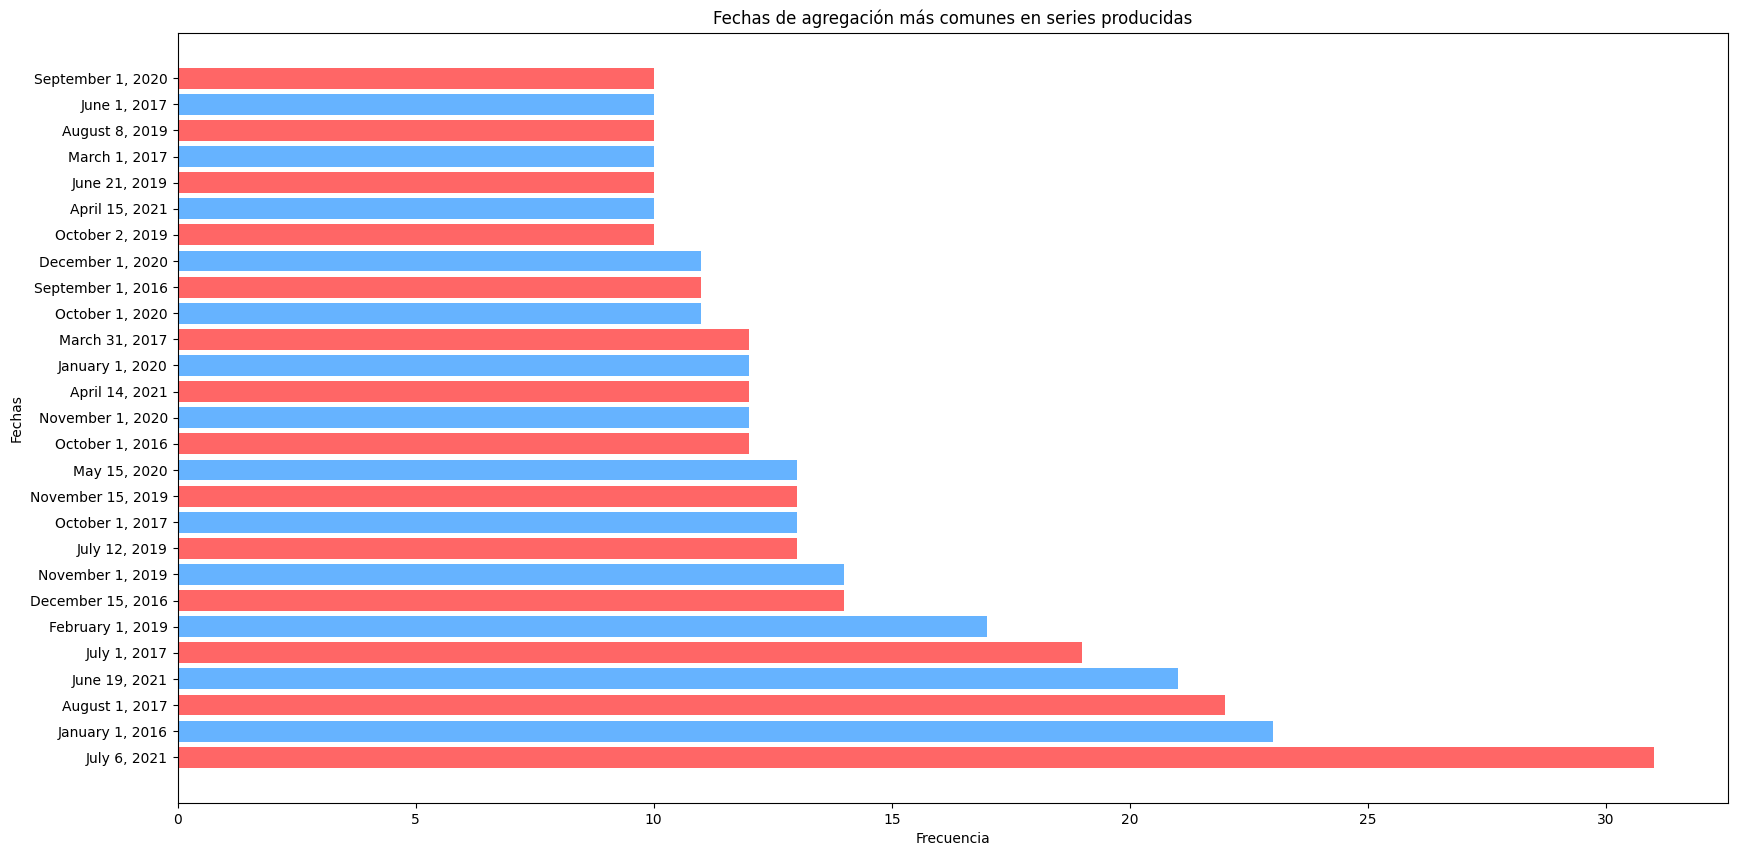

In [44]:
Fecha_Comunes_S = ObjetoGraficas.ResultadoValores[ObjetoGraficas.ResultadoValores>=10]

ObjetoGraficas.GraficaBarras('#ff6666', '#66b3ff', "Frecuencia", "Fechas", "Fechas de agregación más comunes en series producidas", Fecha_Comunes_S, 20, 10)

In [45]:
#Columan: director
ObjetoGraficas.ProcesarColumnasDataset(ObjetoDataset.SeriesTelevison["director"])

ObjetoGraficas.ResultadoProcesamiento.head(10)

Ken Burns              3
Alastair Fothergill    3
Hsu Fu-chun            2
Lynn Novick            2
Joe Berlinger          2
Shin Won-ho            2
Iginio Straffi         2
Stan Lathan            2
Jung-ah Im             2
Rob Seidenglanz        2
Name: director, dtype: int64

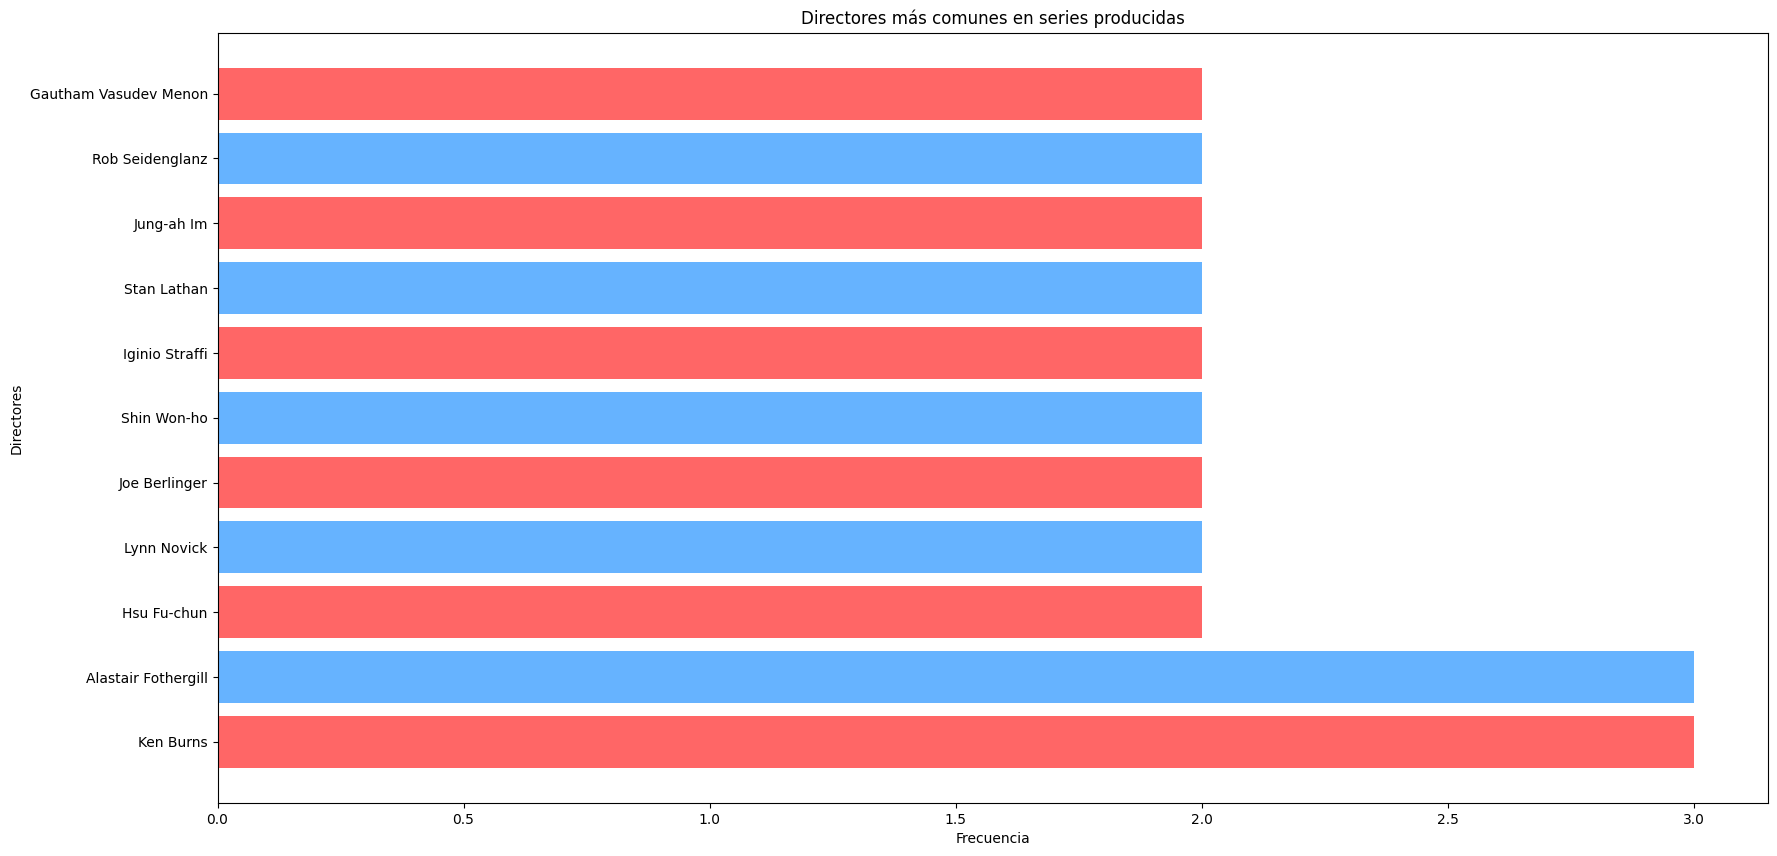

In [46]:
Directores_Comunes_S = ObjetoGraficas.ResultadoProcesamiento[ObjetoGraficas.ResultadoProcesamiento>=2]

ObjetoGraficas.GraficaBarras('#ff6666', '#66b3ff', "Frecuencia", "Directores", "Directores más comunes en series producidas", Directores_Comunes_S, 20, 10)

En todos estos bloques observados, se están sacando las cantidad de valores totales por cada columna que conserve el dataset de series de televisión. De lo anterior, se realiza el proceso las variables cast, director, rating, duration, country, release_year, date_added y listed_in. Ciertamente, algunos conservan condiciones porque los resultados son bastante extensos para ser representados en la gráfica de barras. Por lo tanto, se obtienen los datos más comunes que muestran un factor diferenciador de los demás. Finalmente, se imprimen en la gráfica. 

## FASE 3: PREPARACIÓN DEL DATASET.

In [47]:
Preparacion_Dataset = ObjetoDataset.Archivo

Preparacion_Dataset.head(8)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


Guardando el dataset original en otra variable nueva con el propósito de no alterar o modificar el inicial. 

In [48]:
Nulos_Peliculas = ObjetoDataset.ValoresNulosTipo(ObjetoDataset.Peliculas)

show_id           0
type              0
title             0
director        188
cast            475
country         440
date_added        0
release_year      0
rating            2
duration          3
listed_in         0
description       0
dtype: int64


In [49]:
Nulos_Series = ObjetoDataset.ValoresNulosTipo(ObjetoDataset.SeriesTelevison)

show_id            0
type               0
title              0
director        2446
cast             350
country          391
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64


Revisando los valores nulos que conserva el dataset de películas y series de televisión. De esa manera, se procede a tomar decisiones para eliminarlos por completo o aplicar un método con tal de reemplazar esos datos faltantes. 

### 3.1. Eliminando columnas que no agregan valor

In [50]:
Dataset_DC = Preparacion_Dataset.drop(["show_id", "director", "cast", "description", "title"], axis = 1)

Dataset_DC.head(10)

,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
5,TV Show,NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
6,Movie,NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies
7,Movie,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,Movie,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas"


En esta parte, se eliminan las columnas observadas en el bloque de código, dado que se pretende analizar tanto películas como series, sin embargo el análisis descriptivo de las series nos indica que hay un total de 2446 datos nulos de directores de series, de un total de 2634 directores de series, por lo que no se puede aplicar ningún método para llenar esos datos debido a que no hay suficiente información para hacerlo, además de que si tomamos directores de películas para rellenar esos faltantes, la categoría directores quedaría muy sesgada. Por otro lado, en el contexto real, los directores prefieren a ciertos actores más que otros debido al enfoque que los actores le han dado a su carrera, por lo que la categoría actores por sí sola no genera información relevante, además la gráfica de distribución de los actores nos indica que hay una participación muy similar en películas y series, por lo que no hay un factor diferenciador como en el caso de los países con Estados Unidos. La columna show_id es simplemente es un id que va de s1 hasta sn, y el titulo y la descripción son textos que no son relevantes para los modelos de ML.

### 3.2. Eliminando datos NaN encontrados en el dataset

In [51]:
#Eliminando datos NaN del dataset
Dataset_DNAN = Dataset_DC.dropna(subset=['country'])

#Colocando la moda en las columnas "rating", "date_added" y "duration"
Moda_rating1 = Dataset_DNAN['rating'].mode()[0]
Moda_rating2 = Dataset_DNAN['date_added'].mode()[0]
Moda_rating3 = Dataset_DNAN['duration'].mode()[0]

# Llenamos los valores NaN con la moda de las columnas
Dataset_DNAN['rating'] = Dataset_DNAN['rating'].fillna(value=Moda_rating1)
Dataset_DNAN['date_added'] = Dataset_DNAN['date_added'].fillna(value=Moda_rating2)
Dataset_DNAN['duration'] = Dataset_DNAN['duration'].fillna(value=Moda_rating3)

Dataset_DNAN.isnull().sum()

/tmp/ipykernel_4486/2179279322.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_DNAN['rating'] = Dataset_DNAN['rating'].fillna(value=Moda_rating1)
/tmp/ipykernel_4486/2179279322.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_DNAN['date_added'] = Dataset_DNAN['date_added'].fillna(value=Moda_rating2)
/tmp/ipykernel_4486/2179279322.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


type            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

A raíz de que se encontró que los valores NaN en la columna "country" no son de gran tamaño, se concluyó que no afectaría en la preparación del dataset. Además de que distribuir la moda en esta columna con un tamaño de 831 valores NaN sería negativo, dado que sería Estados Unidos, provocando un sesgo en la etapa de modelado. Esto se contempla porque Estados Unidos tiene un proporción enorme en todos los datos. En ese mismo orden de ideas, en las columnas rating, date_added y duration se colocaron las modas por conservar tamaños relativamente pequeños. Finalmente, se verifica que no existan valores NaN. 

In [52]:
Dataset_DNAN

,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,TV Show,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...
8801,Movie,"United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers"
8802,Movie,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers"
8804,Movie,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies"
8805,Movie,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies"


### 3.3. Modificando variables categóricas a numéricas

In [53]:
#Se hace un split de la columna "date_added" con respecto a sus datos, y se crea un nuevo dataframe
Dataset_fecha = pd.DataFrame(Dataset_DNAN['date_added'].str.split(',', expand=True))

#Se le coloca un nombre a cada columna en el nuevo dataframe
Dataset_fecha.columns = ['dia', 'ano']

#Reemplazando los nuevos valores (año) a la columna "date_added" en el dataset trabajado
Dataset_DNAN['date_added'] = Dataset_fecha["ano"]

#Mostrando dataset modificado en la columna "date_added"
Dataset_DNAN.head(10)

/tmp/ipykernel_4486/1639178683.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_DNAN['date_added'] = Dataset_fecha["ano"]


,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,United States,2021,2020,PG-13,90 min,Documentaries
1,TV Show,South Africa,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,India,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
8,TV Show,United Kingdom,2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
9,Movie,United States,2021,2021,PG-13,104 min,"Comedies, Dramas"
12,Movie,"Germany, Czech Republic",2021,2021,TV-MA,127 min,"Dramas, International Movies"
15,TV Show,United States,2021,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas"
17,TV Show,Mexico,2021,2020,TV-MA,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ..."
21,TV Show,Turkey,2021,2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,..."


La lógica en esta parte es conservar el año que contiene el valor de la columna "date_added", dado que continua representado adecuadamente la variable. Por ejemplo, a la fecha "September 25, 2021" se extrae el año 2021 para reemplazarse nuevamente en la columna. 

In [54]:
# Hacemos un split de la columna "duration" y creamos un nuevo dataframe
Dataset_duration = pd.DataFrame(Dataset_DNAN['duration'].str.split(' ', expand = True))

#Se le coloca un nombre a cada columna en el nuevo dataframe
Dataset_duration.columns = ['A', 'B']

#Reemplazando los nuevos valores a la columna "duration" en el dataset trabajado
Dataset_DNAN['duration'] = Dataset_duration["A"]

#Mostrando el dataset
Dataset_DNAN.head(10)

/tmp/ipykernel_4486/3549974057.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_DNAN['duration'] = Dataset_duration["A"]


,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,United States,2021,2020,PG-13,90,Documentaries
1,TV Show,South Africa,2021,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,India,2021,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021,1993,TV-MA,125,"Dramas, Independent Movies, International Movies"
8,TV Show,United Kingdom,2021,2021,TV-14,9,"British TV Shows, Reality TV"
9,Movie,United States,2021,2021,PG-13,104,"Comedies, Dramas"
12,Movie,"Germany, Czech Republic",2021,2021,TV-MA,127,"Dramas, International Movies"
15,TV Show,United States,2021,2021,TV-MA,4,"TV Comedies, TV Dramas"
17,TV Show,Mexico,2021,2020,TV-MA,2,"Crime TV Shows, Spanish-Language TV Shows, TV ..."
21,TV Show,Turkey,2021,2018,TV-14,5,"International TV Shows, TV Action & Adventure,..."


Para este bloque de código, se obtiene el valor numérico que acompaña la cadena en la columna. Por ejemplo, el dato "90 min" se extrae el valor 90 para modificarse nuevamente. Esto se realiza con todos los datos encontrados. 

In [55]:
#Creando diccionario para cambiar rating a númericas
Diccionario_Rating = {
    "TV-MA": 1,
    "R": 2,
    "PG-13": 3,
    "TV-14": 4,
    "TV-PG": 5,
    "NR": 6,
    "TV-G": 7,
    "TV-Y": 8,
    "TV-Y7": 9,
    "PG": 10,
    "G": 11,
    "NC-17": 12,
    "TV-Y7-FV": 13,
    "UR": 14,
    "74 min": 15,
    "84 min": 16,
    "66 min": 17
}#Fin diccionario

#Reemplazando valores númericos en la columna "rating" a partir del diccionario
Dataset_DNAN['rating'] = Dataset_DNAN['rating'].replace(Diccionario_Rating)

#Imprimiendo el dataset
Dataset_DNAN

/tmp/ipykernel_4486/2659802374.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset_DNAN['rating'] = Dataset_DNAN['rating'].replace(Diccionario_Rating)


,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,United States,2021,2020,3,90,Documentaries
1,TV Show,South Africa,2021,2021,1,2,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,India,2021,2021,1,2,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,"United States, Ghana, Burkina Faso, United Kin...",2021,1993,1,125,"Dramas, Independent Movies, International Movies"
8,TV Show,United Kingdom,2021,2021,4,9,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...
8801,Movie,"United Arab Emirates, Jordan",2016,2015,1,96,"Dramas, International Movies, Thrillers"
8802,Movie,United States,2019,2007,2,158,"Cult Movies, Dramas, Thrillers"
8804,Movie,United States,2019,2009,2,88,"Comedies, Horror Movies"
8805,Movie,United States,2020,2006,10,88,"Children & Family Movies, Comedies"


Para modificar la columna "rating", se estableció previamente un diccionario donde representará cada clasificación con un número correspondiente. Posteriormente, con funciones de Python, se reemplazaron esos valores en la columna. 

In [56]:
#Se crea un diccionario de continentes que cambiará el país por el continente que pertenece
continentes = {
    'Africa': {
        'Algeria', 
        'Angola', 
        'Botswana', 
        'Burkina Faso', 
        'Cameroon', 
        'Egypt', 
        'Ethiopia', 
        'Ghana', 
        'Kenya', 
        'Malawi', 
        'Mauritius', 
        'Morocco', 
        'Mozambique', 
        'Namibia', 
        'Nigeria', 
        'Senegal', 
        'Somalia', 
        'South Africa', 
        'Sudan', 
        'Uganda', 
        'Zimbabwe'
    },
    
    'asia': {
        'Afghanistan', 
        'Bangladesh', 
        'Cambodia', 
        'Cambodia,', 
        'China', 
        'Hong Kong', 
        'India', 
        'Indonesia', 
        'Iran', 
        'Iraq', 
        'Israel', 
        'Japan', 
        'Jordan', 
        'Kazakhstan', 
        'Kuwait', 
        'Lebanon', 
        'Malaysia', 
        'Mongolia', 
        'Myanmar', 
        'Nepal', 
        'North Korea', 
        'Pakistan', 
        'Palestine', 
        'Philippines', 
        'Saudi Arabia', 
        'Singapore', 
        'South Korea', 
        'Sri Lanka', 
        'Syria', 
        'Taiwan', 
        'Thailand', 
        'Turkey', 
        'United Arab Emirates', 
        'Vietnam'
    },

    'europe': {
        'Albania', 
        'Armenia', 
        'Austria', 
        'Azerbaijan', 
        'Belarus', 
        'Belgium', 
        'Bulgaria', 
        'Croatia', 
        'Cyprus', 
        'Czech Republic', 
        'Denmark', 
        'Estonia', 
        'Finland', 
        'France', 
        'Georgia', 
        'Germany', 
        'Greece', 
        'Hungary', 
        'Iceland', 
        'Ireland', 
        'Italy', 
        'Latvia', 
        'Liechtenstein', 
        'Lithuania', 
        'Luxembourg', 
        'Malta', 
        'Montenegro', 
        'Netherlands', 
        'North Macedonia', 
        'Norway', 
        'Poland', 
        'Portugal', 
        'Romania', 
        'Russia', 
        'Serbia', 
        'Slovakia', 
        'Slovenia', 
        'Spain',
        'Sweden',
        'Switzerland',
        'Ukraine',
        'United Kingdom',
        'Vatican City'
        },

    'america': {
        'Bahamas',
        'Canada',
        'Cayman Islands',
        'Dominican Republic',
        'Mexico',
        'Nicaragua',
        'Puerto Rico',
        'United States',
        'Argentina',
        'Brazil',
        'Chile',
        'Colombia',
        'Ecuador',
        'Paraguay',
        'Peru',
        'Uruguay',
        'Venezuela'
        },

    'oceania': {
        'Australia',
        'New Zealand',
        'Samoa'
        }
}#Fin diccionario

In [57]:
#lógica que mapea cada país a su respectivo continente
paises_continentes = {}
for continente, paises in continentes.items():
    for pais in paises:
        paises_continentes[pais] = continente

#Guardando el dataset resultante en un nuevo
df = Dataset_DNAN

#Aplicando los cambios a este nuevo dataset en la columna "country"
df['country'] = df['country'].map(paises_continentes)

#imprimiendo dataset
df

/tmp/ipykernel_4486/4202906381.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].map(paises_continentes)


,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,america,2021,2020,3,90,Documentaries
1,TV Show,Africa,2021,2021,1,2,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,asia,2021,2021,1,2,"International TV Shows, Romantic TV Shows, TV ..."
7,Movie,NaN,2021,1993,1,125,"Dramas, Independent Movies, International Movies"
8,TV Show,europe,2021,2021,4,9,"British TV Shows, Reality TV"
...,...,...,...,...,...,...,...
8801,Movie,NaN,2016,2015,1,96,"Dramas, International Movies, Thrillers"
8802,Movie,america,2019,2007,2,158,"Cult Movies, Dramas, Thrillers"
8804,Movie,america,2019,2009,2,88,"Comedies, Horror Movies"
8805,Movie,america,2020,2006,10,88,"Children & Family Movies, Comedies"


La idea en este bloque de código es crear un diccionario que indique a qué continente pertenece cada país. De esa manera, se disminuye la cantidad de países disponibles en el dataset. Finalmente, con un ciclo se modifica los valores esperados. 

In [58]:
#Aplicando lógica para conocer los valos NaN en el dataset de películas
peliculas_df = df.loc[df['type'] == 'Movie']
peliculas_df.isnull().sum()

type               0
country         1077
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

In [59]:
#Aplicando lógica para conocer los valos NaN en el dataset de series de televisión
Series_df = df.loc[df['type'] == 'TV Show']
Series_df.isnull().sum()

type              0
country         245
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
dtype: int64

In [60]:
#Eliminando datos NaN encontrados en la columna Country
df = df.dropna(subset=['country'])

#Revisando si existen valores nulos en el dataset
df.isnull().sum()

type            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Debido a que en la columna "country" se encuentran valores concatenados, el procedimiento anterior asigna a estos datos valores NaN. Por lo tanto, con los dos bloque de códigos previos, se determina dicha cantidad. Como resultado, el dataset películas contiene la mayor cantidad de valores NaN y el dataset series de televisión conserva valores pequeños. De lo anterior, se decide eliminarlos porque la cantidad de películas siguen siendo bastantes o significativos. 

In [61]:
#Creando diccionario para cambiar continentes a númericas
DiccionarioC = {
    "america": 1,
    "europe": 2,
    "asia": 3,
    "oceania": 4,
    "Africa": 5,
}#Fin diccionario

#Reemplazando valores nuevos en la columna "country"
df['country'] = df['country'].replace(DiccionarioC)

#Imprimiendo dataset tratado
df

/tmp/ipykernel_4486/739872077.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['country'].replace(DiccionarioC)


,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,1,2021,2020,3,90,Documentaries
1,TV Show,5,2021,2021,1,2,"International TV Shows, TV Dramas, TV Mysteries"
4,TV Show,3,2021,2021,1,2,"International TV Shows, Romantic TV Shows, TV ..."
8,TV Show,2,2021,2021,4,9,"British TV Shows, Reality TV"
9,Movie,1,2021,2021,3,104,"Comedies, Dramas"
...,...,...,...,...,...,...,...
8800,TV Show,3,2016,2012,5,1,"International TV Shows, Romantic TV Shows, TV ..."
8802,Movie,1,2019,2007,2,158,"Cult Movies, Dramas, Thrillers"
8804,Movie,1,2019,2009,2,88,"Comedies, Horror Movies"
8805,Movie,1,2020,2006,10,88,"Children & Family Movies, Comedies"


Con los países modificados a continentes, el siguiente paso es asignarle a cada continente un valor numérico. En este sentido, se determinó una diccionario con dichos elementos. Finalmente, se aplican funciones de Python para realizar los cambios. 

In [62]:
#Creando una nueva columna en el dataset para poner a cada dato un género representativo
df["genre"] = df.listed_in.str.extract(
    r"(Movies|Shows|Thrillers|Crime|Anime|Reality|Kids|Documentaries|Docuseries|Horror|Action & Adventure|Sci-Fi & Fantasy|Romantic|Dramas|Comedies|Stand-Up|Sports|Trillers|Classic|cult|Children & Family|Science & Nature|Music)",
    expand = False,
)

#Imprimiendo resultados
df

/tmp/ipykernel_4486/2011040742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["genre"] = df.listed_in.str.extract(


,type,country,date_added,release_year,rating,duration,listed_in,genre
0,Movie,1,2021,2020,3,90,Documentaries,Documentaries
1,TV Show,5,2021,2021,1,2,"International TV Shows, TV Dramas, TV Mysteries",Shows
4,TV Show,3,2021,2021,1,2,"International TV Shows, Romantic TV Shows, TV ...",Shows
8,TV Show,2,2021,2021,4,9,"British TV Shows, Reality TV",Shows
9,Movie,1,2021,2021,3,104,"Comedies, Dramas",Comedies
...,...,...,...,...,...,...,...,...
8800,TV Show,3,2016,2012,5,1,"International TV Shows, Romantic TV Shows, TV ...",Shows
8802,Movie,1,2019,2007,2,158,"Cult Movies, Dramas, Thrillers",Movies
8804,Movie,1,2019,2009,2,88,"Comedies, Horror Movies",Comedies
8805,Movie,1,2020,2006,10,88,"Children & Family Movies, Comedies",Children & Family


El objetivo de esta parte, es cambiar los valores concatenados que conservan cada dato en la columna "listed_in". Para lograr esto, se le asigna a cada uno un género representativo a partir de la cadena encontrada. Además, se crea una nueva columna que contempla dichas modificaciones. 

In [63]:
#Creando un diccionario de los géneros principales para asignarle un valor númerico
genero = {
    'Movies': 1,
    'Shows': 2,
    'Thrillers': 3,
    'Crime': 4,
    'Anime': 5,
    'Reality': 6,
    'Kids': 7,
    'Documentaries': 8,
    'Docuseries': 9,
    'Horror': 10,
    'Action & Adventure': 11,
    'Sci-Fi & Fantasy': 12,
    'Romantic': 13,
    'Dramas': 14,
    'Comedies': 15,
    'Stand-Up': 16,
    'Sports': 17,
    'Trillers': 18,
    'Classic': 19,
    'cult': 20,
    'Children & Family': 21,
    'Science & Nature': 22,
    'Music': 23
}#Fin diccionario

#Reemplazando valores nuevos en la columna "genre" a partir del diccionario creado
df['genre'] = df['genre'].replace(genero)

#Eliminando la columna antigua que contiene géneros concatenados
df = df.drop('listed_in', axis=1)

#Renombrando la nueva columna como "listed_in"
df.rename(columns={'genre': 'listed_in'}, inplace=True)

df_sn = df

#Imprimiendo dataset tratado
df

/tmp/ipykernel_4486/4128611247.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['genre'] = df['genre'].replace(genero)


,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,1,2021,2020,3,90,8
1,TV Show,5,2021,2021,1,2,2
4,TV Show,3,2021,2021,1,2,2
8,TV Show,2,2021,2021,4,9,2
9,Movie,1,2021,2021,3,104,15
...,...,...,...,...,...,...,...
8800,TV Show,3,2016,2012,5,1,2
8802,Movie,1,2019,2007,2,158,1
8804,Movie,1,2019,2009,2,88,15
8805,Movie,1,2020,2006,10,88,21


En esta parte se procede asignando un valor numérico a cada género. Luego, se aplicar el diccionario a la columna nueva creada previamente, y se elimina la antigua. 

In [64]:
import copy

df_sn1 = copy.copy(df)
df_sn1

,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,0.00,1.000000,0.987342,0.1250,0.286174,0.318182
1,TV Show,1.00,1.000000,1.000000,0.0000,0.003215,0.045455
4,TV Show,0.50,1.000000,1.000000,0.0000,0.003215,0.045455
8,TV Show,0.25,1.000000,1.000000,0.1875,0.025723,0.045455
9,Movie,0.00,1.000000,1.000000,0.1250,0.331190,0.636364
...,...,...,...,...,...,...,...
8800,TV Show,0.50,0.615385,0.886076,0.2500,0.000000,0.045455
8802,Movie,0.00,0.846154,0.822785,0.0625,0.504823,0.000000
8804,Movie,0.00,0.846154,0.848101,0.0625,0.279743,0.636364
8805,Movie,0.00,0.923077,0.810127,0.5625,0.279743,0.909091


In [65]:
#Creando un diccionario de los géneros principales para asignarle un valor númerico
typ = {
    'Movie': 0,
    'TV Show': 1,
}#Fin diccionario

#Reemplazando valores nuevos en la columna "genre" a partir del diccionario creado
df['type'] = df['type'].replace(typ)

#Imprimiendo dataset tratado
df

,type,country,date_added,release_year,rating,duration,listed_in
0,0,1,2021,2020,3,90,8
1,1,5,2021,2021,1,2,2
4,1,3,2021,2021,1,2,2
8,1,2,2021,2021,4,9,2
9,0,1,2021,2021,3,104,15
...,...,...,...,...,...,...,...
8800,1,3,2016,2012,5,1,2
8802,0,1,2019,2007,2,158,1
8804,0,1,2019,2009,2,88,15
8805,0,1,2020,2006,10,88,21


In [66]:
import copy

df_sn2 = copy.copy(df)
df_sn2

,type,country,date_added,release_year,rating,duration,listed_in
0,0,1,2021,2020,3,90,8
1,1,5,2021,2021,1,2,2
4,1,3,2021,2021,1,2,2
8,1,2,2021,2021,4,9,2
9,0,1,2021,2021,3,104,15
...,...,...,...,...,...,...,...
8800,1,3,2016,2012,5,1,2
8802,0,1,2019,2007,2,158,1
8804,0,1,2019,2009,2,88,15
8805,0,1,2020,2006,10,88,21


In [67]:
# y = asduiadguiahsdgasd.asd

### 3.4. Normalizando el dataset final

In [68]:
#Importando librería
from sklearn.preprocessing import MinMaxScaler

#Normalizando el dataset con el objetivo de que conserven una misma escala

# Convertimos las columnas del 1 al 7 a enteros
df_sn1.iloc[:,1:7] = df_sn1.iloc[:,1:7].astype(int)

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizamos las dos columnas del DataFrame
df_sn1.iloc[:, 1:7] = scaler.fit_transform(df_sn1.iloc[:, 1:7])

#Imprimiendo el dataset normalizado
df_sn1

,type,country,date_added,release_year,rating,duration,listed_in
0,Movie,0.00,1.000000,0.987342,0.1250,0.286174,0.318182
1,TV Show,1.00,1.000000,1.000000,0.0000,0.003215,0.045455
4,TV Show,0.50,1.000000,1.000000,0.0000,0.003215,0.045455
8,TV Show,0.25,1.000000,1.000000,0.1875,0.025723,0.045455
9,Movie,0.00,1.000000,1.000000,0.1250,0.331190,0.636364
...,...,...,...,...,...,...,...
8800,TV Show,0.50,0.615385,0.886076,0.2500,0.000000,0.045455
8802,Movie,0.00,0.846154,0.822785,0.0625,0.504823,0.000000
8804,Movie,0.00,0.846154,0.848101,0.0625,0.279743,0.636364
8805,Movie,0.00,0.923077,0.810127,0.5625,0.279743,0.909091


In [69]:
#Importando librería
from sklearn.preprocessing import MinMaxScaler

#Normalizando el dataset con el objetivo de que conserven una misma escala

# Convertimos las columnas
df_sn2.iloc[:,:] = df_sn2.iloc[:,:].astype(int)

# Creamos un objeto MinMaxScaler
scaler = MinMaxScaler()

# Normalizamos las dos columnas del DataFrame
df_sn2.iloc[:, :] = scaler.fit_transform(df_sn2.iloc[:, :])

#Imprimiendo el dataset normalizado
df_sn2

,type,country,date_added,release_year,rating,duration,listed_in
0,0.0,0.00,1.000000,0.987342,0.1250,0.286174,0.318182
1,1.0,1.00,1.000000,1.000000,0.0000,0.003215,0.045455
4,1.0,0.50,1.000000,1.000000,0.0000,0.003215,0.045455
8,1.0,0.25,1.000000,1.000000,0.1875,0.025723,0.045455
9,0.0,0.00,1.000000,1.000000,0.1250,0.331190,0.636364
...,...,...,...,...,...,...,...
8800,1.0,0.50,0.615385,0.886076,0.2500,0.000000,0.045455
8802,0.0,0.00,0.846154,0.822785,0.0625,0.504823,0.000000
8804,0.0,0.00,0.846154,0.848101,0.0625,0.279743,0.636364
8805,0.0,0.00,0.923077,0.810127,0.5625,0.279743,0.909091


Con el dataset modificado, es necesario normalizarlo con el objetivo de que todos los valores numéricos conserven una misma escala. De ese modo, se evita generar problemas al momento de implementar los modelos. 

### 3.5. Mapa de calor del dataset normalizado

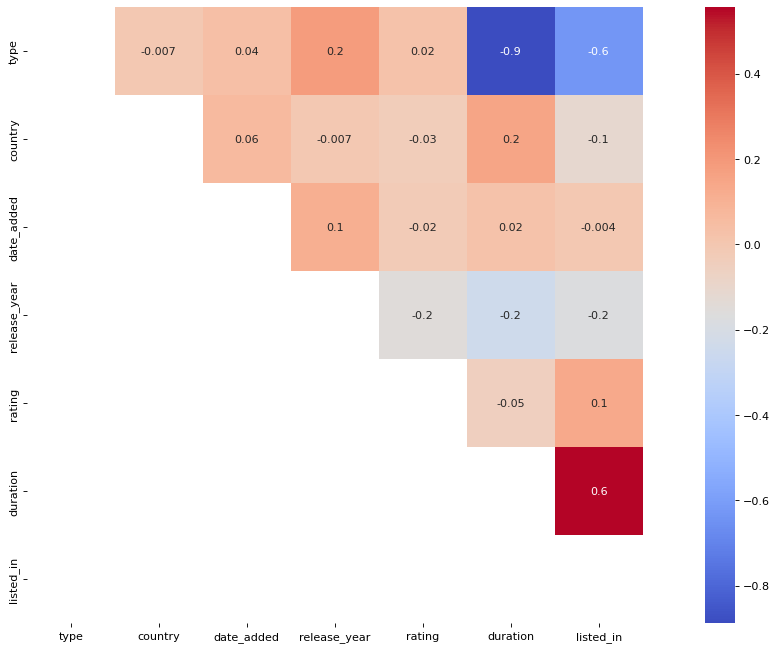

In [70]:
plt.figure(figsize=(20, 10), dpi = 80)
mask = np.tril(df_sn2.corr())
sns.heatmap(df_sn2.corr(), cmap = "coolwarm", annot = True, fmt = '.1g' ,square = True, mask = mask);

### 3.6. Dividiendo el dataset

Esta parte consiste en obtener el conjunto de datos de entrenamiento y pruebas para los modelos. Sin embargo, el proceso se realizará manual por las proporciones diferentes que conservan las películas y series de televisión. 

A raíz de que la proporción de películas es más grande que la proporción de series de televisión, se aplica una lógica para igualar las proporciones.

In [95]:
#Sacando el conjunto de datos de entrenamiento y prueba para películas
X = df_sn1.drop(["type"], axis = 1)
y = df_sn1["type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [96]:
#Validando tamaño de conjuntos de datos
print("X_train: " + str(X_train.shape))
print("X_test: " + str(X_test.shape))
print("y_train: " + str(y_train.shape))
print("y_test: " + str(y_test.shape))

X_train: (4657, 6)
X_test: (1997, 6)
y_train: (4657,)
y_test: (1997,)


En este bloque de código, se implementa una lógica que permita obtener una misma proporción de películas como series. Esto con el objetivo de evitar que en la etapa de entrenamiento, los modelos se entrenen únicamente con películas y no con series de televisión. 

## FASE 4: MODELOS.

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Importando librerías para utilizar los modelos estudiados en clase. 

### 4.1. Naives Bayes

In [97]:
#Modelo Naives Bayes

#Creando objeto de algoritmo
NaiveBayes = GaussianNB()

#Entrenando el modelo a partir del conjunto de datos X_train
NaiveBayes.fit(X_train, y_train)

#Prediciendo datos a partir del conjunto de datos y_train
NaiveBayes_pred = NaiveBayes.predict(X_test)

### 4.2. K_nearest Neighbors

In [98]:
#Creando objeto del modelo
KNclassifier = KNeighborsClassifier(n_neighbors = 57)

#Entrenando el modelo a partir del conjunto de datos X_train
KNclassifier.fit(X_train, y_train)

#Prediciendo datos a partir del conjunto de datos y_train
K_NN_pred = KNclassifier.predict(X_test)

### 4.3. Regresión Logística 

In [99]:
#Creando un objeto del modelo
LRclassifier = LogisticRegression()

#Entrenando el modelo a partir del conjunto de datos X_train
LRclassifier.fit(X_train, y_train)

#Prediciendo datos a partir del conjunto de datos y_train
RL_pred = LRclassifier.predict(X_test)

### 4.4. Árbol de decisión

In [100]:
#Creando un objeto del modelo
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)

#Entrenando el modelo a partir del conjunto de datos X_train
DTclassifier.fit(X_train, y_train)

#Prediciendo datos a partir del conjunto de datos y_train
AD_pred = DTclassifier.predict(X_test)

### 4.5. Random Forest

In [101]:
#Creando un objeto del modelo
RFclassifier = RandomForestClassifier()

#Entrenando el modelo a partir del conjunto de datos X_train
RFclassifier.fit(X_train, y_train)

#Prediciendo datos a partir del conjunto de datos y_train
RF_pred = RFclassifier.predict(X_test)

### 4.6. K-Means

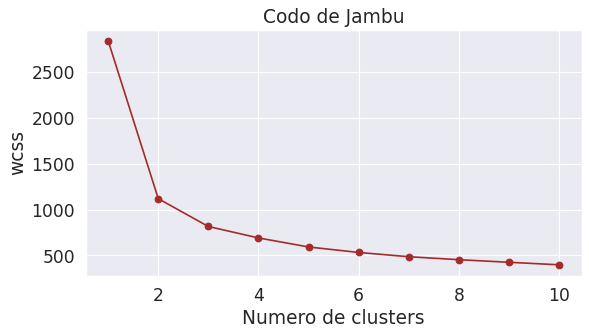

In [102]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_sn2)                             #Aplicar K-means
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4), dpi = 80)
plt.plot(range(1,11), wcss, marker='o', color = 'brown')
plt.title("Codo de Jambu")
plt.xlabel('Numero de clusters')
plt.ylabel('wcss') #wcss es un indicador de que tan similares son los individuos dentro de los cluster
plt.grid(True)
plt.show()

Es un método que se utiliza para determinar el número óptimo de clusters en un modelo de clustering, basándose en la variabilidad dentro de los clusters. Por lo tanto, se trata de un método de evaluación de la calidad de los clusters que se refiere a la varianza dentro de los clusters (intra-cluster), y no a la varianza entre los clusters (inter-cluster).

La idea es buscar el punto en la gráfica donde la variabilidad total disminuye drásticamente (haciendo una forma de "codo"), ya que este punto indica el número óptimo de clusters. En este caso 2 clusters, los cuales ya se esperaban debido a que se tienen películas y series.

In [103]:
clustering = KMeans(n_clusters = 2, init = 'k-means++', n_init = 10, max_iter = 300, tol = 0.0001, random_state = 0) #Crea el modelo

clustering.fit(df_sn2) #Aplica el modelo a la base de datos

y = clustering.fit_predict(df_sn2)

y

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

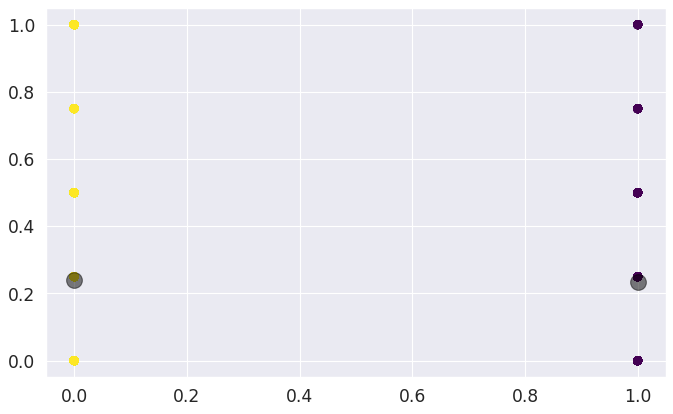

In [104]:
dfg = df_sn2.to_numpy()

plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(dfg[:, 0], dfg[:, 1], c = y, s = 50, cmap = 'viridis')

centers = clustering.cluster_centers_

plt.scatter(centers[:, 0], centers[:,1], c='black', s = 200, alpha = 0.5);

En este grafico se busca identificar como se distribuyen los clusters, mas sin embargo no es representativo debido a que se tienen muchas columnas, por lo que se debe utilizar algún metodo de reducción de variables como el PCA.

In [84]:
df['KMeans_Clusters'] = clustering.labels_  #Los resultados del modelos se guardan en labels_ dentro del modelo
df = df.astype(int)
df

,type,country,date_added,release_year,rating,duration,listed_in,KMeans_Clusters
0,0,1,2021,2020,3,90,8,1
1,1,5,2021,2021,1,2,2,0
4,1,3,2021,2021,1,2,2,0
8,1,2,2021,2021,4,9,2,0
9,0,1,2021,2021,3,104,15,1
...,...,...,...,...,...,...,...,...
8800,1,3,2016,2012,5,1,2,0
8802,0,1,2019,2007,2,158,1,1
8804,0,1,2019,2009,2,88,15,1
8805,0,1,2020,2006,10,88,21,1


Se genero un nuevo database con la columna KMeans_Clusters.

### Metodo de componentes principales

Se utiliza para comprimir la cantidad de categorías en las dos más importantes, con el fin de visualizar los clusters.

In [85]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_df = pca.fit_transform(df_sn2)
pca_1_df = pd.DataFrame(data = pca_df, columns = ['Componente_1', 'Componente_2'])
#pca = pd.concat([pca_1_df, df[['KMeans_Clusters']]], axis = 1)

pca_1_df

,Componente_1,Componente_2
0,-0.242556,-0.186871
1,0.824487,0.778992
2,0.824838,0.290638
3,0.818288,0.039656
4,-0.366555,-0.238151
...,...,...
6649,0.817234,0.265446
6650,-0.202421,-0.110749
6651,-0.359965,-0.245531
6652,-0.457610,-0.315215


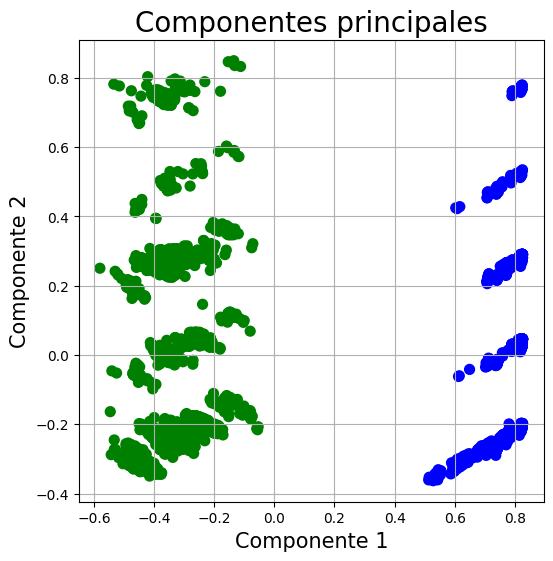

In [86]:
fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1', fontsize = 15)
ax.set_ylabel('Componente 2', fontsize = 15)
ax.set_title('Componentes principales', fontsize = 20)

color_theme = np.array(["blue", "green"])

ax.scatter(x = pca_1_df.Componente_1, y = pca_1_df.Componente_2, c = color_theme[df.KMeans_Clusters], s = 50)

plt.grid(True) 
plt.show()

En la grafica vemos que los datos se agrupan muy lejos de otros, debido a la propia naturaleza de estos. La misma base de datos se sesgan por país, duración y tipo.

### 4.7. Adaboost

In [105]:
#Creando un objeto del modelo
ada = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100, random_state=0)

#Entrenando el modelo a partir del conjunto de datos X_train
ada.fit(X_train,y_train)

#Prediciendo datos a partir del conjunto de datos y_train
Ada_predict = ada.predict(X_test)

## FASE 5: EVALUACIÓN DE MODELOS.

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Importando librerías para utilizar la métricas de rendimiento en los modelos establecidos. 

### 5.1. Naives Bayes

Precisión del modelo:  98.94842263395093


<AxesSubplot: >

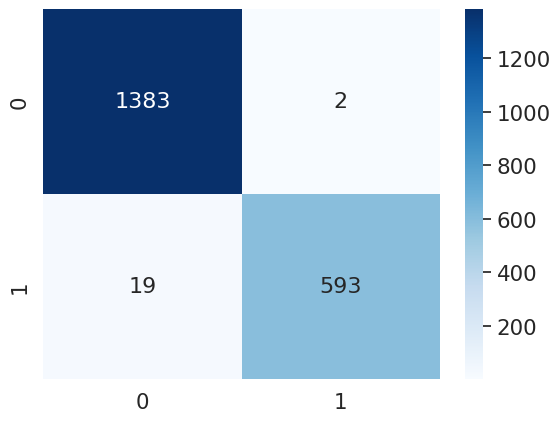

In [106]:
#Porcentaje de precisión
NaiveBayes_accuracy = accuracy_score(y_test, NaiveBayes_pred)

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, NaiveBayes_pred)

#Imprimiendo resultados
print('Precisión del modelo: ', NaiveBayes_accuracy*100)

# Crear una matriz de confusión estilizada con Seaborn
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')

### 5.2. K_nearest Neighbors

Precisión del modelo:  98.09714571857788


<AxesSubplot: >

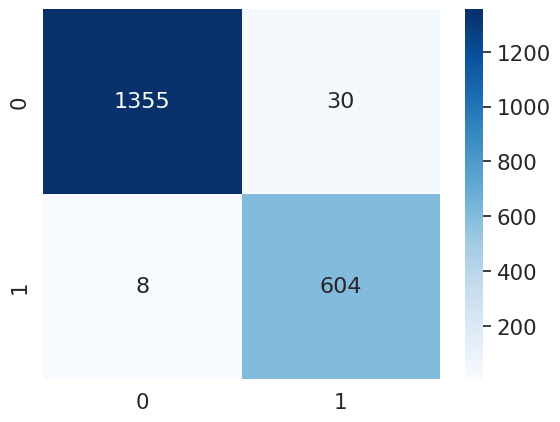

In [107]:
#Porcentaje de precisión
K_NN_accuracy = accuracy_score(y_test, K_NN_pred )

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, K_NN_pred )

#Imprimiendo resultados
print('Precisión del modelo: ', K_NN_accuracy*100)

# Crear una matriz de confusión estilizada con Seaborn
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')

### 5.3. Regresión Logística

Precisión del modelo:  98.4977466199299


<AxesSubplot: >

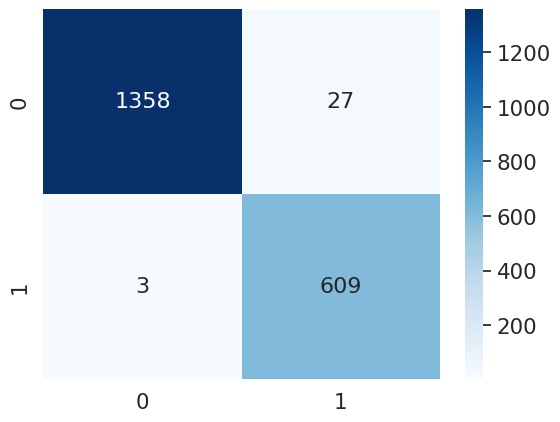

In [108]:
#Porcentaje de precisión
RL_accuracy = accuracy_score(y_test, RL_pred)

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, RL_pred)

#Imprimiendo resultados
print('Precisión del modelo: ', RL_accuracy*100)

# Crear una matriz de confusión estilizada con Seaborn
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')

### 5.4. Random Forest

Precisión del modelo:  99.74962443665498


<AxesSubplot: >

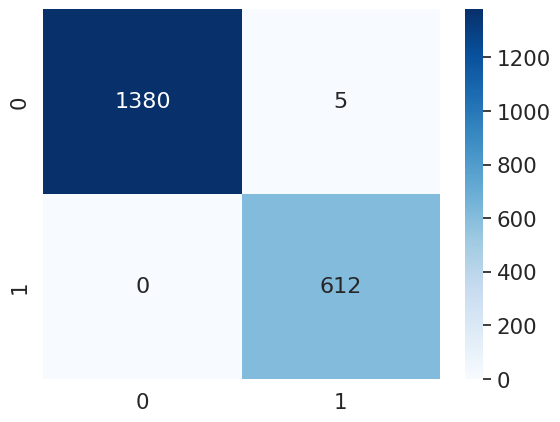

In [109]:
#Porcentaje de precisión
RF_accuracy = accuracy_score(y_test, RF_pred)

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, RF_pred)

#Imprimiendo resultados
print('Precisión del modelo: ', RF_accuracy*100)

# Crear una matriz de confusión estilizada con Seaborn
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')

### 5.5. Adaboost

Precisión del modelo:  99.69954932398598


<AxesSubplot: >

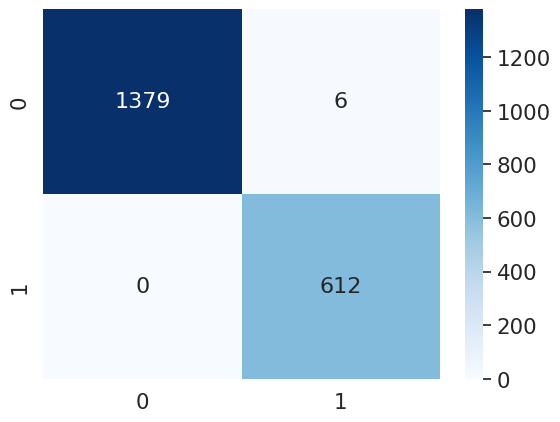

In [110]:
#Porcentaje de precisión
Ada_accuracy = accuracy_score(y_test, Ada_predict)

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, Ada_predict)

#Imprimiendo resultados
print('Precisión del modelo: ',Ada_accuracy*100)

# Crear una matriz de confusión estilizada con Seaborn
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')

### 5.6. Árbol de decisión

Precisión del modelo:  99.74962443665498


<AxesSubplot: >

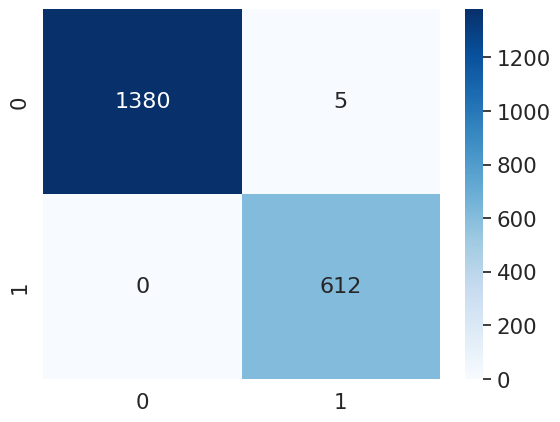

In [111]:
#Porcentaje de precisión
AD_accuracy = accuracy_score(y_test, AD_pred)

#Matriz de confusión
conf_matrix = confusion_matrix(y_test, AD_pred)

#Imprimiendo resultados
print('Precisión del modelo: ',AD_accuracy*100)

# Crear una matriz de confusión estilizada con Seaborn
sns.set(font_scale=1.4)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap="Blues", fmt='g')

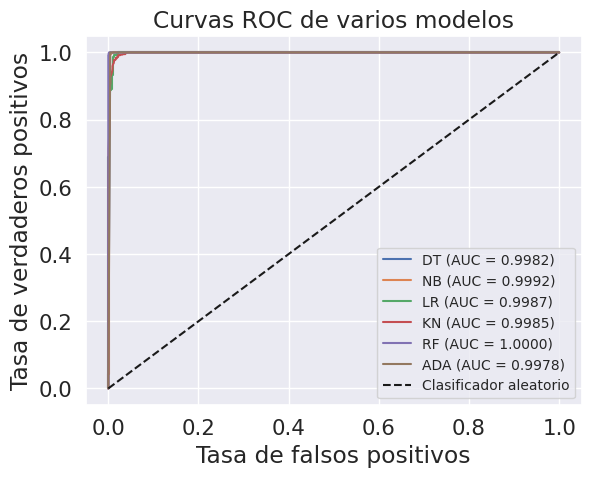

In [130]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Codificar las etiquetas de texto de y_test como valores numéricos binarios
y_test_binary = le.fit_transform(y_test)

model1 = DTclassifier
model2 = NaiveBayes
model3 = LRclassifier
model4 = KNclassifier
model5 = RFclassifier
model6 = ada

# Definir los modelos y sus etiquetas
models = [model1, model2, model3, model4, model5, model6]
labels = ['DT', 'NB', 'LR', 'KN', 'RF', 'ADA']

# Calcular las curvas ROC y las áreas bajo las curvas (AUC) para cada modelo
for i, model in enumerate(models):
    y_score = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_binary, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    # Graficar la curva ROC de cada modelo
    plt.plot(fpr, tpr, label=labels[i] + ' (AUC = %0.4f)' % roc_auc)

# Graficar la curva ROC del clasificador aleatorio
plt.plot([0, 1], [0, 1], 'k--', label='Clasificador aleatorio')
# Configurar las etiquetas y el título de la gráfica
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curvas ROC de varios modelos')
plt.legend(loc="lower right", fontsize=10)
plt.show()

## FASE 6: DESPLIEGUE.

Con la selección e implementación del óptimo modelo de aprendizaje construido, se busca minimizar en la inversión de gastos innecesarios que pueden traer grandes consecuencias al modelo de negocio de Netflix, de tal manera que ofrezca una orientación o recomendación adecuada a la empresa para la producción de diferentes tipos de contenidos con tal de consumirse en el servicio de la plataforma. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ef76bbd9-d0ac-42f3-984d-55bd53ad16e3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>